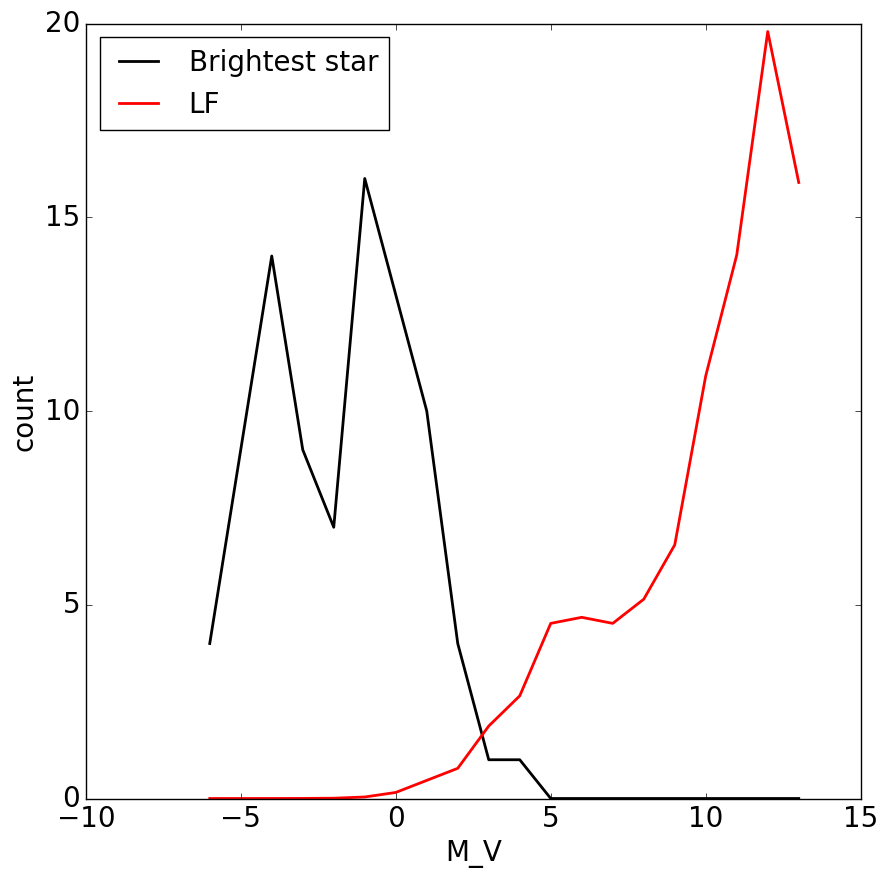

In [266]:
#demonstrate the difference of the luminosity function with biased sampling using the 92 all sky brightest stars.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
mv_bri = np.array([-1.46,-0.74,-0.27,-0.05,0.03,0.08,0.13,0.34,0.46,0.50,0.61,0.76,\
          0.76,0.86,0.96,0.97,1.14,1.16,1.25,1.25,1.39,1.50,1.62,1.62,1.64,\
          1.64,1.65,1.69,1.69,1.72,1.74,1.77,1.77,1.79,1.80,1.82,1.84,1.85,\
          1.86,1.86,1.90,1.91,1.92,1.94,1.96,1.98,1.98,2.00,2.00,2.08,2.02,\
          2.05,2.05,2.06,2.06,2.07,2.08,2.09,2.11,2.12,2.15,2.17,2.21,2.21,\
          2.23,2.23,2.23,2.23,2.24,2.25,2.26,2.27,2.28,2.29,2.30,2.30,2.31,\
          2.31,2.35,2.37,2.38,2.39,2.40,2.42,2.43,2.44,2.45,2.46,2.47,2.48,2.48,2.50])
dis_bri = np.array([8.6,310,4.4,37,25,42,860,11,140,640,350,17,320,65,600,260,34,25,\
           2600,350,77,430,700,52,240,88,130,110,2000,840,100,81,820,120,590,\
           1800,270,140,100,630,100,420,100,180,80,500,430,66,180,130,96,\
           220,200,97,61,47,130,720,36,93,170,130,690,570,\
           1500,150,75,900,230,1100,350,78,54,202,380,550,65,400,310,79,77,\
           460,670,200,49,84,2000,540,610,140,72,404])
dis_bri_pc = dis_bri/3.26
Mv_bri = mv_bri+5-5*np.log10(dis_bri_pc)
Mv0 = np.arange(-6.5,14.5,1)

sp = [2, 32, 21, 7, 3, 21, 6, 1]
Mv = np.array([-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13])
lf = np.array([0.0001, 0.0006, 0.0029, 0.013, 0.05, 0.25, 1, 3, 5, 12, 17, 29, 30, 29, 33, 42, 70, 90, 127, 102])

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111)
h_bri,xedge = np.histogram(Mv_bri,Mv0)
e1, = ax.plot(Mv,h_bri,'k-',linewidth=2,label='Brightest stars')
e2, = ax.plot(Mv,lf/np.sum(lf)*len(Mv_bri),'r-',linewidth=2,label='LF')
plt.legend([e1,e2],['Brightest star','LF'],loc=2,fontsize=20)
ax.set_xlabel('M_V',fontsize=20)
ax.set_ylabel('count',fontsize=20)
fig.show()
fig.savefig('LF_brightstar.png',bbox_inches='tight')

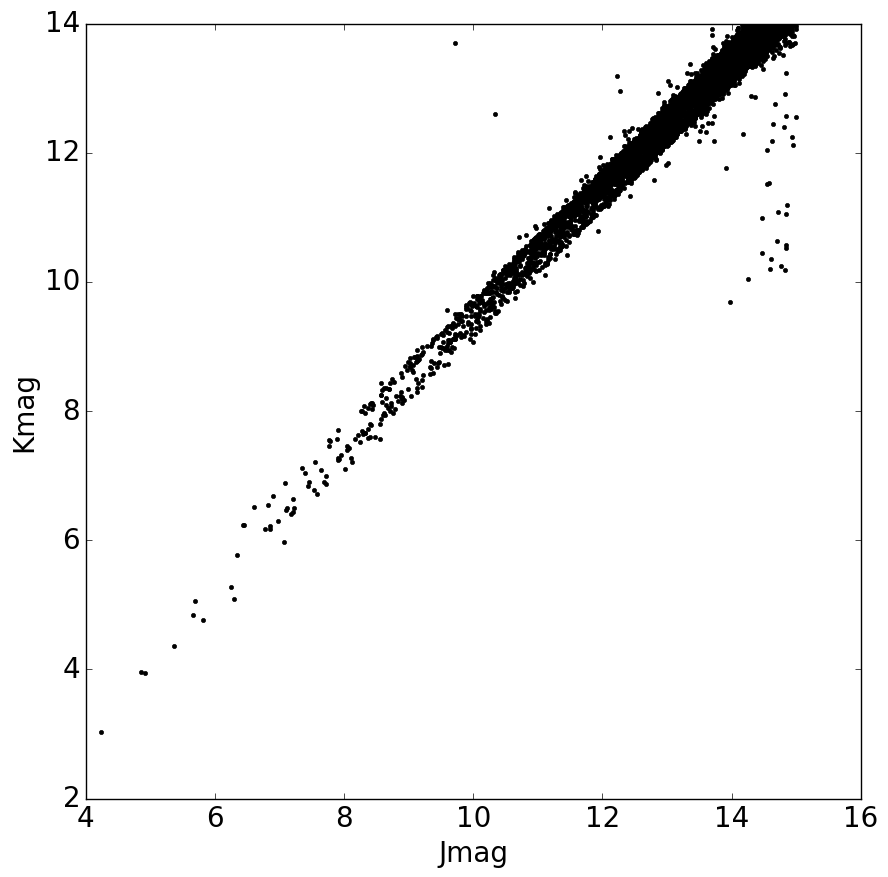

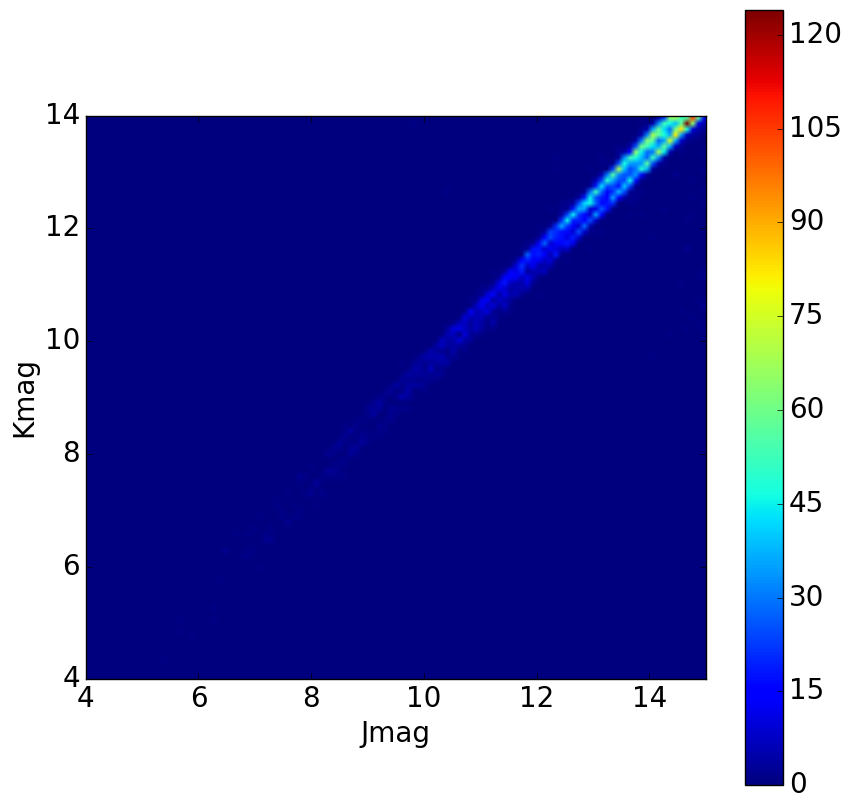

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits 
import os
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

def read2massfile():
    f = open('2mass4616.txt')
    h1 = f.readline()
    h2 = f.readline()
    h3 = f.readline()
    h4 = f.readline()
    
    data=[]
    
    for line in f:
        l = line.strip()
        if l[0]=='#':
            break
        else:
            cols0 = l.split('|')
            radec = cols0[0].split()
            source = {}
            source['ra'] = np.double(radec[0])
            source['dec'] = np.double(radec[1])
            mag1 = cols0[3].split()
            if mag1[0][0]=='-':
                source['J'] = 9999.
            else:
                source['J'] = np.double(mag1[0])
            if mag1[1][0]=='-':
                source['Jerr'] = 9999.
            else:
                source['Jerr'] = np.double(mag1[1])
            mag1 = cols0[4].split()
            if mag1[0][0]=='-':
                source['H'] = 9999.
            else:
                source['H'] = np.double(mag1[0])
            if mag1[1][0]=='-':
                source['Herr'] = 9999.
            else:
                source['Herr'] = np.double(mag1[1])
            mag1 = cols0[5].split()
            if mag1[0][0]=='-':
                source['K'] = 9999.
            else:
                source['K'] = np.double(mag1[0])
            if mag1[1][0]=='-':
                source['Kerr'] = 9999.
            else:
                source['Kerr'] = np.double(mag1[1])
            data.append(source)
    f.close()
    return data

#Read a 2MASS catalog file and extract columns
data = read2massfile()
ra = np.array([data[i]['ra'] for i in range(len(data))])
dec = np.array([data[i]['dec'] for i in range(len(data))])
Jmag = np.array([data[i]['J'] for i in range(len(data))])
Hmag = np.array([data[i]['H'] for i in range(len(data))])
Kmag = np.array([data[i]['K'] for i in range(len(data))])
Jmagerr = np.array([data[i]['Jerr'] for i in range(len(data))])
Hmagerr = np.array([data[i]['Herr'] for i in range(len(data))])
Kmagerr = np.array([data[i]['Kerr'] for i in range(len(data))])

#Draw J - K scatter plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ind = (Jmag<15.) & (Kmag<14.)
ax.plot(Jmag[ind],Kmag[ind],'k.')
ax.set_xlabel('Jmag',fontsize=20)
ax.set_ylabel('Kmag',fontsize=20)
fig.show()
fig.savefig('J-K.png',bbox_inches='tight')

#calculate J vs. K density
Jgrid = np.arange(4,15,0.1)
Kgrid = np.arange(4,14,0.1)
Jcenter = (Jgrid[0:-1]+Jgrid[1:])/2.
Kcenter = (Kgrid[0:-1]+Kgrid[1:])/2.
JKden,xedge,yedge = np.histogram2d(Jmag[ind], Kmag[ind], bins = [Jgrid, Kgrid])

#Draw density map
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
e = ax.imshow(JKden.T, extent=[4,15,14,4])
ax.set_xlim([4,15])
ax.set_ylim([4,14])
plt.colorbar(e)
ax.set_xlabel('Jmag',fontsize=20)
ax.set_ylabel('Kmag',fontsize=20)
fig.show()
fig.savefig('JK_density.png',bbox_inches='tight')

#save data file as ASCII
np.savetxt('JKdata.dat',np.array([ra,dec,Jmag,Jmagerr,Hmag,Hmagerr,Kmag,Kmagerr]).T,\
    fmt='%.5f %+.5f %.3f %.3f %.3f %.3f %.3f %.3f',\
    delimiter=' ', header='ra dec J Jerr H Herr K Kerr')

#save density file as fits
os.remove('imgs/JK_pdf.fits')
hdu=fits.PrimaryHDU(JKden)
hdulist=fits.HDUList([hdu])
hdulist.writeto("JK_pdf.fits")
    

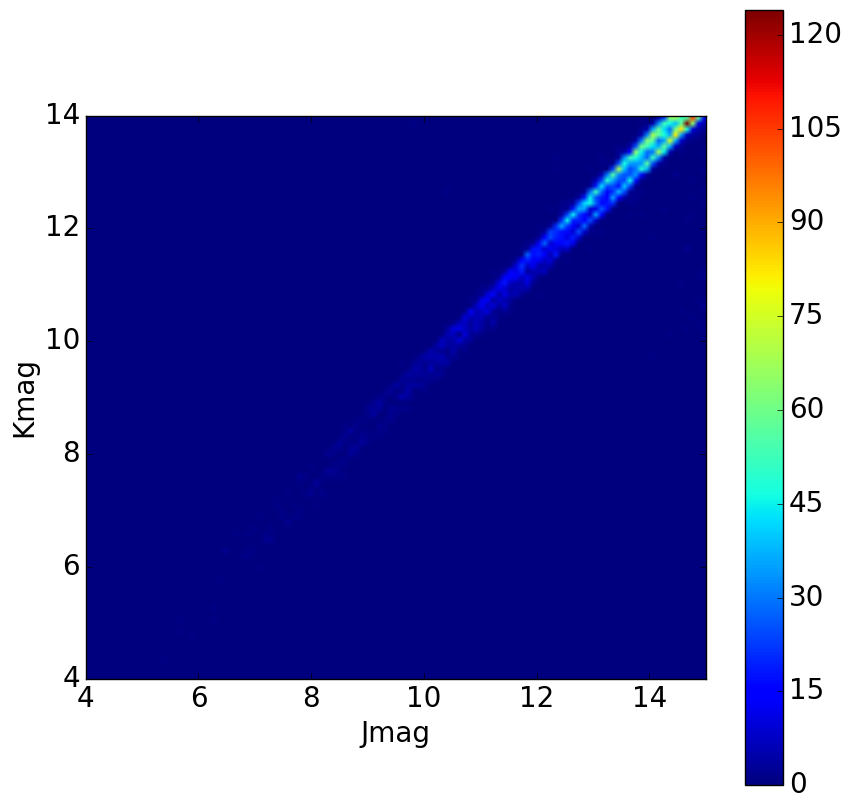

In [287]:
Jgrid = np.arange(4,15,0.1)
Kgrid = np.arange(4,14,0.1)
Jcenter = (Jgrid[0:-1]+Jgrid[1:])/2.
Kcenter = (Kgrid[0:-1]+Kgrid[1:])/2.

hdulist = fits.open('JK_pdf.fits')
JKden2=hdulist[0].data
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
e = ax.imshow(JKden2.T, extent=[4,15,14,4])
ax.set_xlim([4,15])
ax.set_ylim([4,14])
plt.colorbar(e)
ax.set_xlabel('Jmag',fontsize=20)
ax.set_ylabel('Kmag',fontsize=20)
fig.show()

fig.savefig('JK.png',bbox_inches='tight')

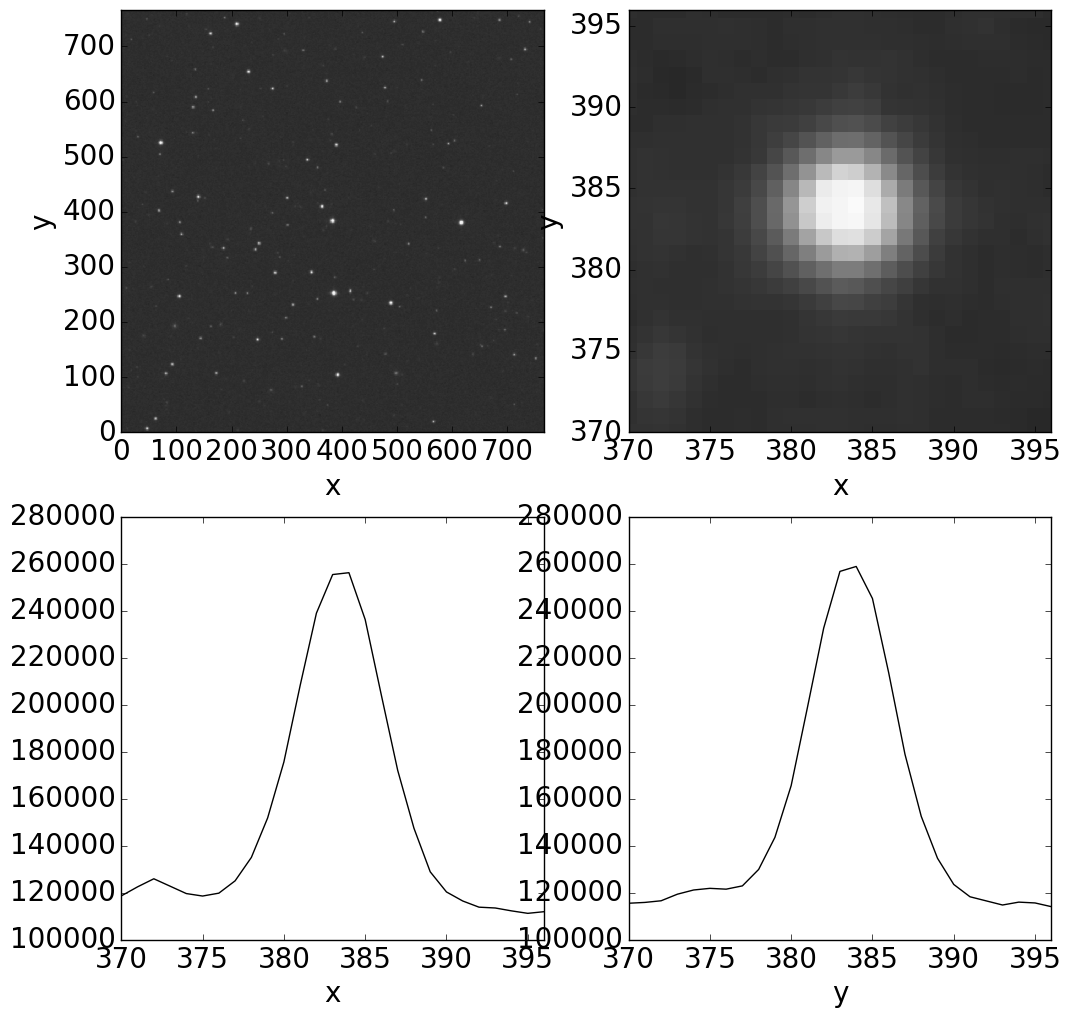

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

hdulist = fits.open('POSSII.F-DSS2.706.fits')
im=hdulist[0].data
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(221)
ax.imshow(im,interpolation='none',extent=[0,767,767,0],cmap=plt.get_cmap('gray'))
ax.set_ylim([0,767])
ax.set_xlim([0,767])
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)

ax = fig.add_subplot(222)
ax.imshow(im,interpolation='none',extent=[0,767,767,0],cmap=plt.get_cmap('gray'))
ax.set_xlim([370,396])
ax.set_ylim([370,396])
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)

ax = fig.add_subplot(223)
ax.plot(np.sum(im[370:396,:],axis=0),'k-')
ax.set_xlim([370,396])
ax.set_ylim([100000,280000])
ax.set_xlabel('x',fontsize=20)

ax = fig.add_subplot(224)
ax.plot(np.sum(im[:,370:396],axis=1),'k-')
ax.set_xlim([370,396])
ax.set_ylim([100000,280000])
ax.set_xlabel('y',fontsize=20)
fig.show()


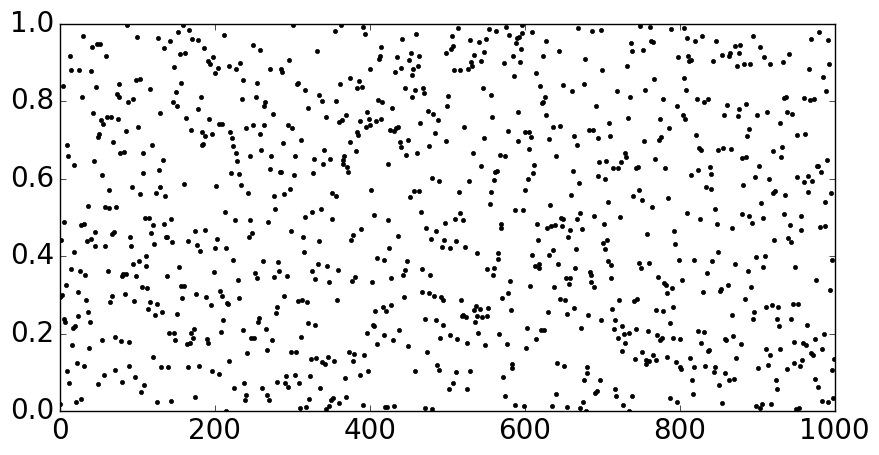

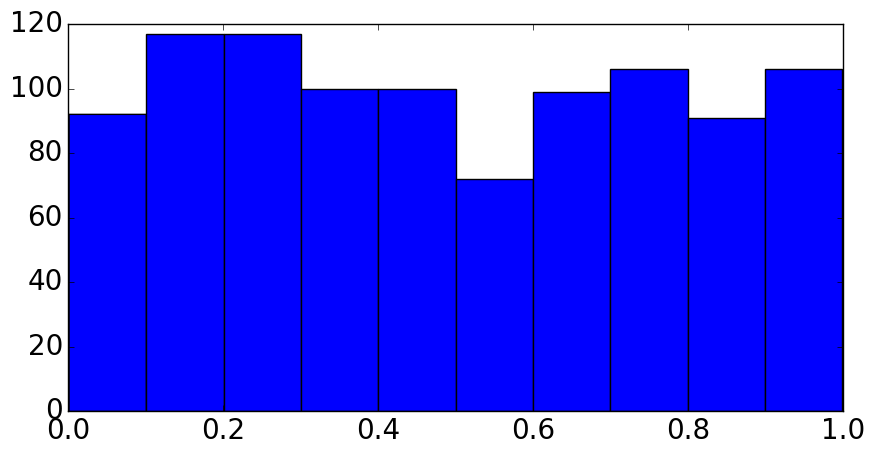

In [153]:
#pseudorandom number generator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

seed = 1223
N = 1000
x = np.zeros((N,1))
x[0] = seed
for i in range(1,N):
    x[i] =np.float((x[i-1]*123+59)%65536)

fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
ax.plot(x/65536.,'k.')
fig.show()

fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
ax.hist(x/65536.)
fig.show()

1.99850923593 0.336413052858


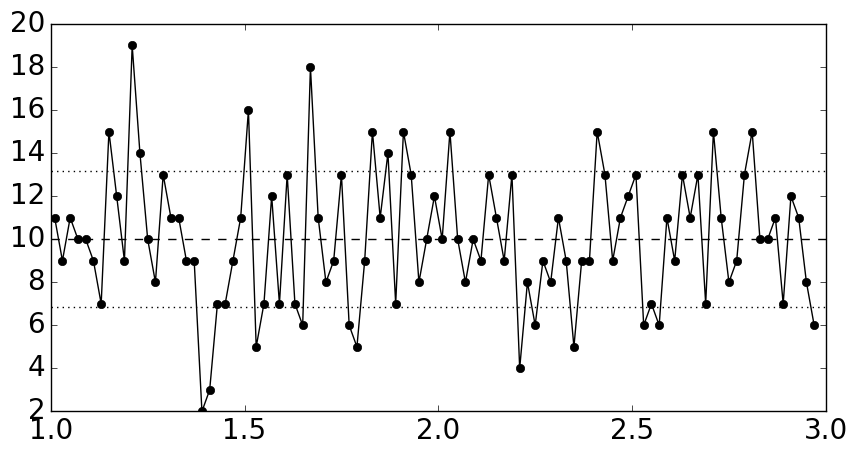

In [154]:
#uniform random number
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

x = np.random.uniform(1.,3.,size=1000)

xgrid = np.arange(1,3,0.02)
xcenter = (xgrid[1:]+xgrid[0:len(xgrid)-1])/2.         
hx,xedge = np.histogram(x,xgrid)

fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
ax.plot(xcenter,hx,'ko-')
ax.plot([1.,3.],[10.,10.],'k--')
ax.plot([1.,3.],[10.-np.sqrt(10.),10.-np.sqrt(10.)],'k:')
ax.plot([1.,3.],[10.+np.sqrt(10.),10.+np.sqrt(10.)],'k:')
fig.show()
fig.savefig('unifrand_hist.png',bbox_inches='tight')

print np.mean(x), np.var(x)

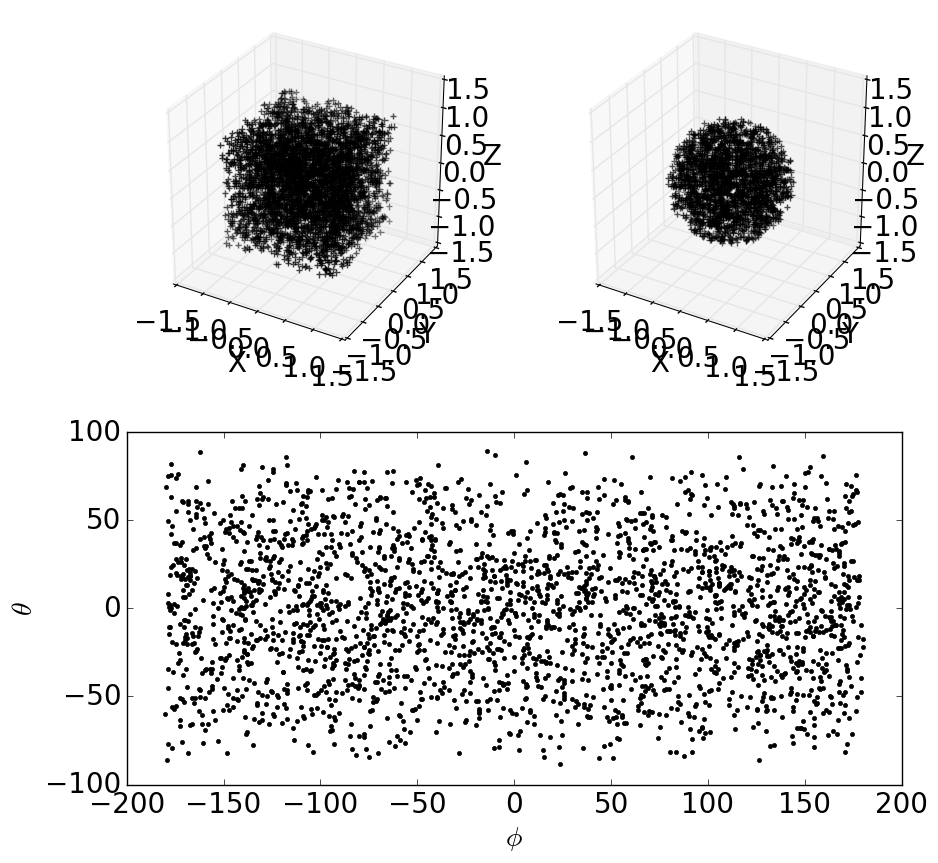

In [155]:
#uniformly distributed spherical coordinates
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

x = np.random.uniform(-1.,1.,5000)
y = np.random.uniform(-1.,1.,5000)
z = np.random.uniform(-1.,1.,5000)

r = x**2 + y**2 + z**2
ind = r<=1.

x1 = x[ind]
y1 = y[ind]
z1 = z[ind]

phi = np.rad2deg(np.arctan2(y1,x1))
theta = np.rad2deg(np.arctan(z1/np.sqrt(x1**2+y1**2)))

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(2,2,1, projection='3d')
ax.scatter(x,y,z,c='k',marker='+')
ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('Z',fontsize=20)

ax = fig.add_subplot(2,2,2, projection='3d')
ax.scatter(x1,y1,z1,c='k',marker='+')
ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('Z',fontsize=20)

ax = fig.add_subplot(2,2,(3,4))
ax.plot(phi,theta,'.k')
ax.set_xlabel(r'$\phi$',fontsize=20)
ax.set_ylabel(r'$\theta$',fontsize=20)

fig.show()
fig.savefig('rand_spherical.png',bbox_inches='tight')

5.0029 2.2370721021 3.0 7.0


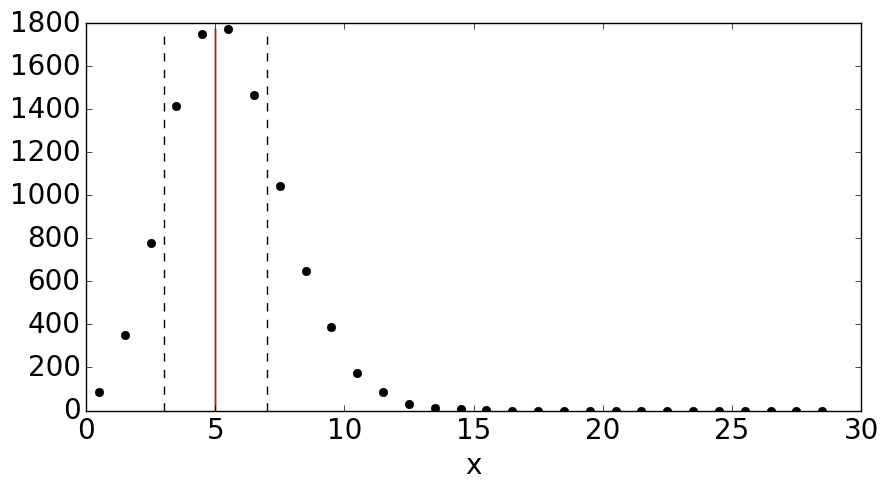

In [156]:
#Poisson random number
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

x = np.random.poisson(5.0,size=10000)

xgrid = np.arange(0.,30.,1.0)
xcenter = (xgrid[1:]+xgrid[0:len(xgrid)-1])/2.         
hx,xedge = np.histogram(x,xgrid)

fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
ax.plot(xcenter,hx,'ko')
ax.plot(np.percentile(x,15.)*np.array([1.,1.]),np.array([0.,np.max(hx)]),'k--')
ax.plot(np.percentile(x,85.)*np.array([1.,1.]),np.array([0.,np.max(hx)]),'k--')
ax.plot(np.mean(x)*np.array([1.,1.]),np.array([0.,np.max(hx)]),'k-')
ax.plot(np.median(x)*np.array([1.,1.]),np.array([0.,np.max(hx)]),'r-')
ax.set_xlabel('x',fontsize=20)
fig.show()
fig.savefig('poisrand_hist.png',bbox_inches='tight')

print np.mean(x), np.std(x),np.percentile(x,15.8),np.percentile(x,100.-15.8)


0.00890271466777 1.00696984701 -1.00588157931 1.02215798936
-1.95064776017 1.96179953177
-3.01742876008 2.9333502286


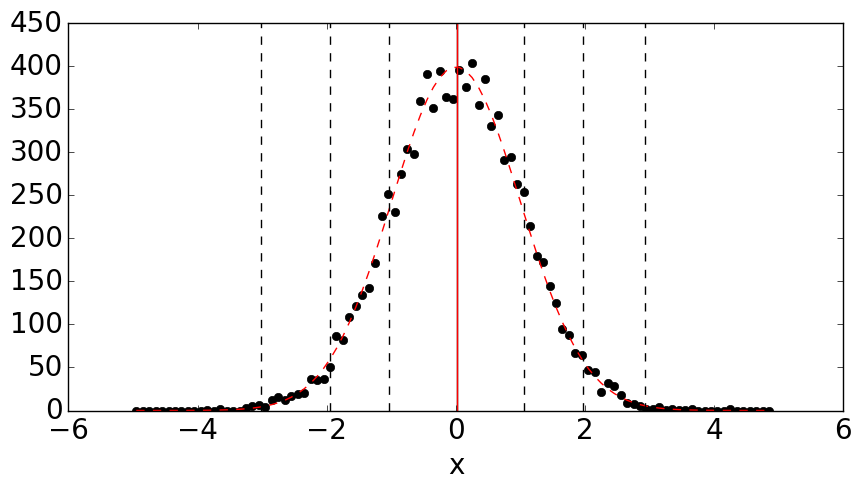

In [157]:
#normal random number
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

x = np.random.normal(0.,1.,size=10000)

xgrid = np.arange(-5.,5.,0.1)
xcenter = (xgrid[1:]+xgrid[0:len(xgrid)-1])/2.         
hx,xedge = np.histogram(x,xgrid)

fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
ax.plot(xcenter,hx,'ko')
x0 = 1./(np.sqrt(2*np.pi)*1)*np.exp(-(xcenter-0)**2/(2*1**2))
ax.plot(xcenter,x0*np.sum(hx)/np.sum(x0),'r--',linewidth=1)
ax.plot(np.percentile(x,15)*np.array([1.,1.]),np.array([0.,450.]),'k--')
ax.plot(np.percentile(x,85)*np.array([1.,1.]),np.array([0.,450.]),'k--')
ax.plot(np.percentile(x,2.5)*np.array([1.,1.]),np.array([0.,450.]),'k--')
ax.plot(np.percentile(x,100.-2.5)*np.array([1.,1.]),np.array([0.,450.]),'k--')
ax.plot(np.percentile(x,0.15)*np.array([1.,1.]),np.array([0.,450.]),'k--')
ax.plot(np.percentile(x,100.-0.15)*np.array([1.,1.]),np.array([0.,450.]),'k--')
ax.plot(np.mean(x)*np.array([1.,1.]),np.array([0.,450.]),'k-')
ax.plot(np.median(x)*np.array([1.,1.]),np.array([0.,450.]),'r-')
ax.set_xlabel('x',fontsize=20)


fig.show()
fig.savefig('normrand_hist.png',bbox_inches='tight')

print np.mean(x), np.std(x),np.percentile(x,15.8),np.percentile(x,100.-15.8)
print np.percentile(x,2.5),np.percentile(x,100.-2.5)
print np.percentile(x,0.15),np.percentile(x,100.-0.15)

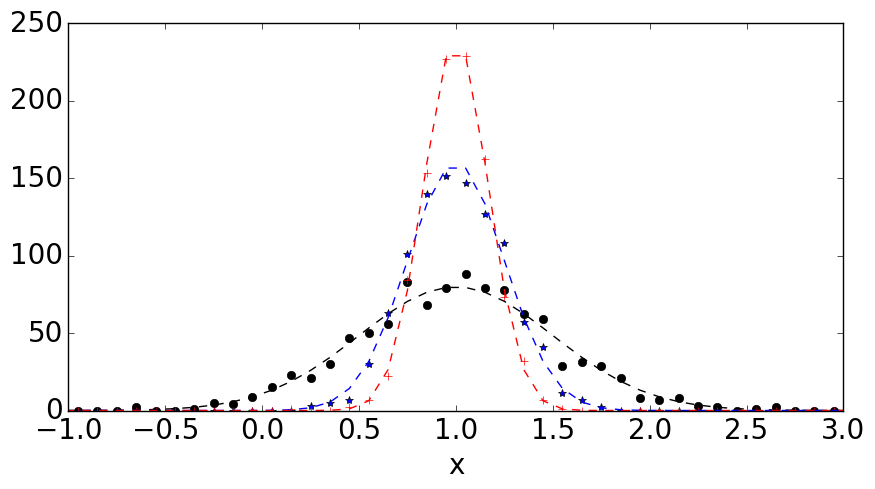

In [158]:
#mean of a series of random variable follwing same normal distribution N(mu,sigma)
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

x1 = np.random.normal(1.,0.5,size=1000)
x2 = np.random.normal(1.,0.5,size=1000)
x3 = np.random.normal(1.,0.5,size=1000)
x4 = np.random.normal(1.,0.5,size=1000)
x5 = np.random.normal(1.,0.5,size=1000)
x6 = np.random.normal(1.,0.5,size=1000)
x7 = np.random.normal(1.,0.5,size=1000)
x8 = np.random.normal(1.,0.5,size=1000)
x9 = np.random.normal(1.,0.5,size=1000)

xgrid = np.arange(-5.,5.,0.1)
xcenter = (xgrid[1:]+xgrid[0:len(xgrid)-1])/2.         
hx1,xedge = np.histogram(x1,xgrid)
hx_tot1,xedge = np.histogram((x1+x2+x3+x4)/4,xgrid)
hx_tot2,xedge = np.histogram((x1+x2+x3+x4+x5+x6+x7+x8+x9)/9,xgrid)

fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
ax.plot(xcenter,hx1,'ko')
ax.plot(xcenter,hx_tot1,'b*')
ax.plot(xcenter,hx_tot2,'r+')
x0 = stats.norm.pdf(xcenter,loc=1., scale=0.5)# 1./(np.sqrt(2*np.pi)*0.5)*np.exp(-(xcenter-1.)**2/(2*0.5**2))
ax.plot(xcenter,x0*np.sum(hx1)/np.sum(x0),'k--',linewidth=1)
x0 =  stats.norm.pdf(xcenter,loc=1., scale=0.5/2.)#1./(np.sqrt(2*np.pi)*0.5/2.)*np.exp(-(xcenter-1.)**2/(2*(0.5/2.)**2))
ax.plot(xcenter,x0*np.sum(hx_tot1)/np.sum(x0),'b--',linewidth=1)
x0 =  stats.norm.pdf(xcenter,loc=1., scale=0.5/3.)#1./(np.sqrt(2*np.pi)*0.5/3.)*np.exp(-(xcenter-1.)**2/(2*(0.5/3.)**2))
ax.plot(xcenter,x0*np.sum(hx_tot2)/np.sum(x0),'r--',linewidth=1)
ax.set_xlabel('x',fontsize=20)
ax.set_xlim([-1,3])

fig.show()
fig.savefig('normrand_mean_hist.png',bbox_inches='tight')



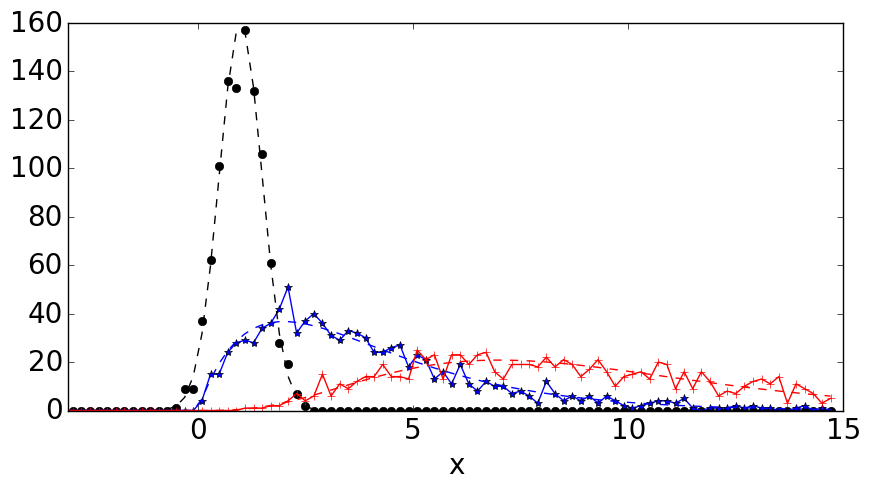

In [159]:
#mean squares of a series of random variable follwing same normal distribution N(mu,sigma)
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

x1 = np.random.normal(1.,0.5,size=1000)
x2 = np.random.normal(1.,0.5,size=1000)
x3 = np.random.normal(1.,0.5,size=1000)
x4 = np.random.normal(1.,0.5,size=1000)
x5 = np.random.normal(1.,0.5,size=1000)
x6 = np.random.normal(1.,0.5,size=1000)
x7 = np.random.normal(1.,0.5,size=1000)
x8 = np.random.normal(1.,0.5,size=1000)
x9 = np.random.normal(1.,0.5,size=1000)

xgrid = np.arange(-5.,15.,0.2)
xcenter = (xgrid[1:]+xgrid[0:len(xgrid)-1])/2.         
hx1,xedge = np.histogram(x1,xgrid)
hx_tot1,xedge = np.histogram(((x1-1.)**2+(x2-1.)**2+(x3-1.)**2+(x4-1.)**2)/(0.5**2),xgrid)
hx_tot2,xedge = np.histogram(((x1-1.)**2+(x2-1.)**2+(x3-1.)**2+(x4-1.)**2+\
                              (x5-1.)**2+(x6-1.)**2+(x7-1.)**2+(x8-1.)**2+(x9-1.)**2)/(0.5**2),xgrid)

fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
ax.plot(xcenter,hx1,'ko')
ax.plot(xcenter,hx_tot1,'b*-')
ax.plot(xcenter,hx_tot2,'r+-')
x0 =  stats.norm.pdf(xcenter,loc=1., scale=0.5)#1./(np.sqrt(2*np.pi)*0.5)*np.exp(-(xcenter-1.)**2/(2*0.5**2))
ax.plot(xcenter,x0*np.sum(hx1)/np.sum(x0),'k--',linewidth=1)

x0 =  stats.chi2.pdf(xcenter,4)
ax.plot(xcenter,x0*np.sum(hx_tot1)/np.sum(x0),'b--',linewidth=1)

x0 = stats.chi2.pdf(xcenter,9)
ax.plot(xcenter,x0*np.sum(hx_tot2)/np.sum(x0),'r--',linewidth=1)
ax.set_xlabel('x',fontsize=20)
ax.set_xlim([-3,15])

fig.show()
fig.savefig('normrand_meansquare_hist.png',bbox_inches='tight')




1.00404317434 0.304623177255 0.690717285088 1.31414701019
1.12522350751 1.30111427254 0.760624933977 1.44679322224
0.992007211002 0.192619328687


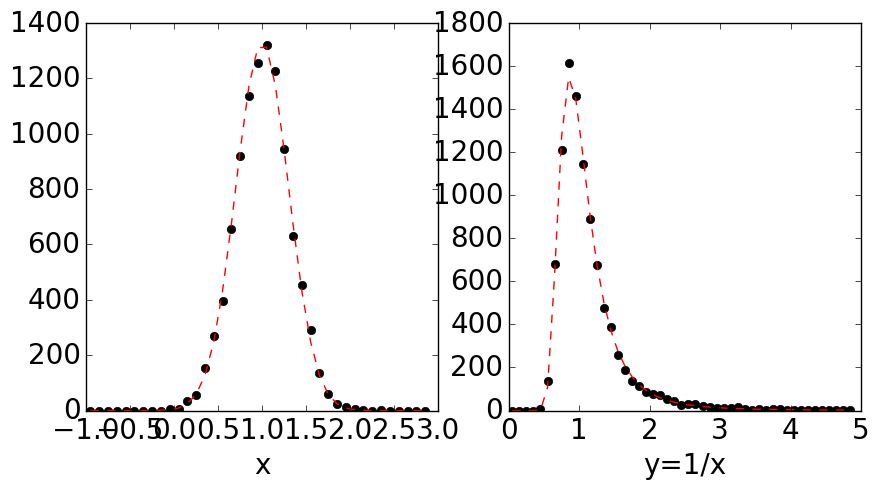

In [283]:
# demonstrate the probability density of distance propagated from the PDF of the parallax 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

x = np.random.normal(1,0.3,size=10000)
y = 1./x

print np.mean(x), np.std(x), np.percentile(x,15),np.percentile(x,85)
print np.mean(y), np.std(y), np.percentile(y,15),np.percentile(y,85)
print np.median(y), np.median(np.abs(y-np.median(y)))

xgrid = np.arange(-1,3,0.1)
xcenter = (xgrid[1:]+xgrid[0:len(xgrid)-1])/2.         
hx,xedge = np.histogram(x,xgrid)

ygrid = np.arange(0,5,0.1)
ycenter = (ygrid[1:]+ygrid[0:len(ygrid)-1])/2.
hy,yedge = np.histogram(y,ygrid)

fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(121)
ax.plot(xcenter,hx,'ko')
x0 = 1./(np.sqrt(2*np.pi)*0.3)*np.exp(-(xcenter-1)**2/(2*0.3**2))
ax.plot(xcenter,x0*np.sum(hx)/np.sum(x0),'r--',linewidth=1)
#ax.plot(np.percentile(x,15)*np.array([1.,1.]),np.array([0.,1400.]),'k--')
#ax.plot(np.percentile(x,85)*np.array([1.,1.]),np.array([0.,1400.]),'k--')
#ax.plot(np.mean(x)*np.array([1.,1.]),np.array([0.,1400.]),'k-')
#ax.plot(np.median(x)*np.array([1.,1.]),np.array([0.,1400.]),'r-')
ax.set_xlabel('x',fontsize=20)

ax = fig.add_subplot(122)
ax.plot(ycenter,hy,'ko')
ax.set_xlabel('y=1/x',fontsize=20)
y0=np.abs(1./ycenter**2)*1./(np.sqrt(2*np.pi)*0.3)*np.exp(-(1./ycenter-1)**2/(2*0.3**2))
ax.plot(ycenter,y0*np.sum(hy)/np.sum(y0),'r--',linewidth=1)
#ax.plot(np.percentile(y,15)*np.array([1.,1.]),np.array([0.,1600.]),'k--')
#ax.plot(np.percentile(y,85)*np.array([1.,1.]),np.array([0.,1600.]),'k--')
#ax.plot(np.mean(y)*np.array([1.,1.]),np.array([0.,1600.]),'k-')
#ax.plot(np.median(y)*np.array([1.,1.]),np.array([0.,1600.]),'r-')
fig.show()
fig.savefig('parallax_distance.png',bbox_inches='tight')

0.100030009003


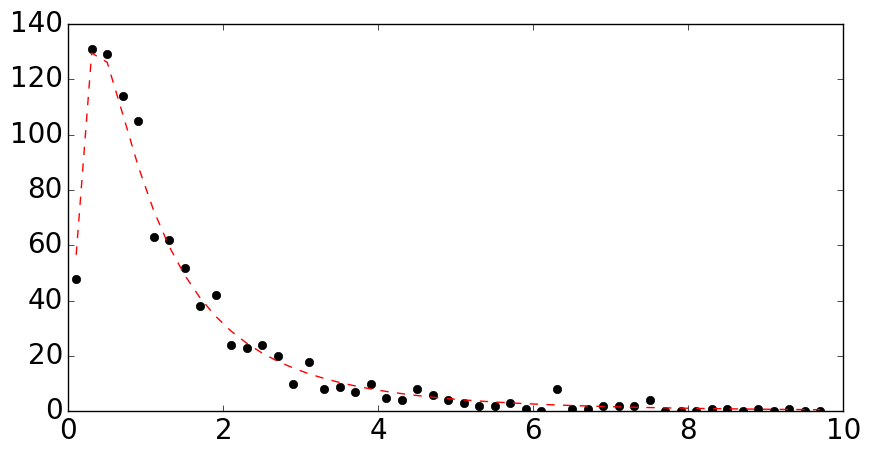

In [162]:
#draw random sample from a generalized PDF
#A. logNormal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

sig = 1.
mu = 0.

def lognorm(x,mu,sig):
    return 1./(np.sqrt(2*np.pi)*sig*x)*np.exp(-(np.log(x)-mu)**2/(2*sig**2))

N = 1000
i = 0
k = 0
x = np.zeros((N,1))
while i<N:
    x0 = np.random.uniform(0,10.)
    y0 = np.random.rand()
    y1 = lognorm(x0,mu,sig)
    if y0<=y1:
        x[i] = x0
        i += 1
    k += 1

xgrid = np.arange(0,10,0.2)
xcenter = (xgrid[0:-1]+xgrid[1:])/2.
hx,xedge = np.histogram(x,xgrid)

y = lognorm(xcenter,mu,sig)

fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
ax.plot(xcenter,hx,'ko')
ax.plot(xcenter,y/np.sum(y)*sum(hx),'r--')
fig.show()

print N/np.float(k)


0.039827943285


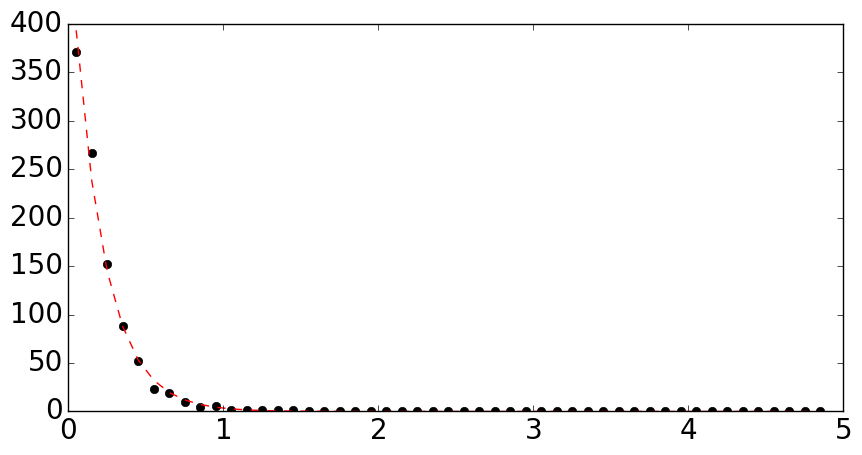

In [163]:
#draw random sample from a generalized PDF
#B exponential
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

theta = 0.2

def exponential(x,theta):
    return 1./theta*np.exp(-x/theta)

N = 1000
i = 0
k = 0
x = np.zeros((N,1))
while i<N:
    x0 = np.random.uniform(0,5.)
    y0 = np.random.rand()/theta
    y1 = exponential(x0,theta)
    if y0<=y1:
        x[i] = x0
        i += 1
    k += 1

xgrid = np.arange(0,5,0.1)
xcenter = (xgrid[0:-1]+xgrid[1:])/2.
hx,xedge = np.histogram(x,xgrid)

y = exponential(xcenter,theta)

fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
ax.plot(xcenter,hx,'ko')
ax.plot(xcenter,y/np.sum(y)*sum(hx),'r--')
fig.show()

print N/np.float(k)

0.3545 0.2195


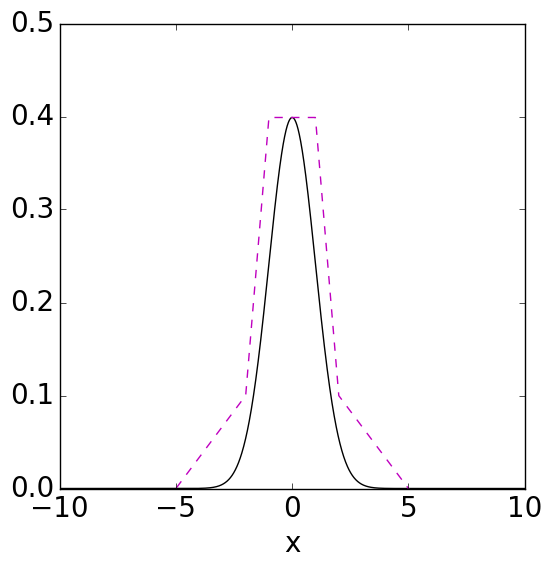

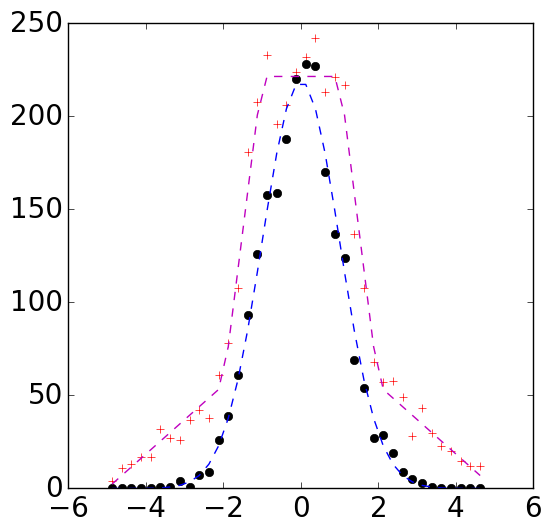

In [164]:
#rejection sampling using a Gaussian as a sample
import numpy as np
import scipy.stats as stats
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

xgrid = np.arange(-10,10,0.01)
xcenter = (xgrid[1:]+xgrid[0:len(xgrid)-1])/2. 

y = stats.norm.pdf(xcenter,loc=0.,scale=1.)

z_1 = (xcenter+5.)/(-2-(-5))*(0.1-0.)+0.
z_2 = (xcenter+2)/(-1-(-2))*(1./(np.sqrt(2*np.pi)*1.)-0.1)+0.1
z_3 = np.repeat(1./(np.sqrt(2*np.pi)*1.),np.shape(y1_1))
z_4 = (xcenter-2)/(1.-2)*(1./(np.sqrt(2*np.pi)*1.)-0.1)+0.1
z_5 = (xcenter-5.)/(2-5)*(0.1-0.)+0.
z = z_1
z[(xcenter>-2) & (xcenter<=-1)] = z_2[(xcenter>-2) & (xcenter<=-1)]
z[(xcenter>-1.) & (xcenter<=1.)] = z_3[(xcenter>-1.) & (xcenter<=1.)]
z[(xcenter>1.) & (xcenter<=2)] = z_4[(xcenter>1.) & (xcenter<=2)]
z[(xcenter>2)] = z_5[(xcenter>2)]

fz = interp1d(xcenter,z)

fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
ax.plot(xcenter,y,'k-')
ax.plot(xcenter,z,'m--')
ax.set_xlabel('x',fontsize=20)
ax.set_ylim([0,0.5])
fig.show()

N=10000
#step 1: draw random numbers from y3
x_rand1 = np.random.uniform(-5,5,size=N)
y_rand1 = np.random.uniform(0.,0.45,size=N)
x_rand = x_rand1[y_rand1<=fz(x_rand1)]

#step 2: draw random numbers following f
y_rand = stats.norm.pdf(x_rand,loc=0.,scale=1.)
Q = y_rand/fz(x_rand)
x_rand2 = np.random.uniform(0.,1.,size=np.shape(x_rand))
x = x_rand[x_rand2<Q]

xgrid2 = np.arange(-5,5,0.25)
xcenter2 = (xgrid2[1:]+xgrid2[0:len(xgrid2)-1])/2. 
hx1,xedge = np.histogram(x_rand,xgrid2)
hx2,xedge = np.histogram(x,xgrid2)

y2 = stats.norm.pdf(xcenter2,loc=0.,scale=1.)
z2 = fz(xcenter2)

fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
ax.plot(xcenter2,hx1,'r+')
ax.plot(xcenter2,hx2,'ko')
ax.plot(xcenter2,y2/sum(y2)*sum(hx2),'b--')
ax.plot(xcenter2,z2/sum(z2)*sum(hx1),'m--')
fig.show()

print len(x_rand)/float(N), len(x)/float(N)

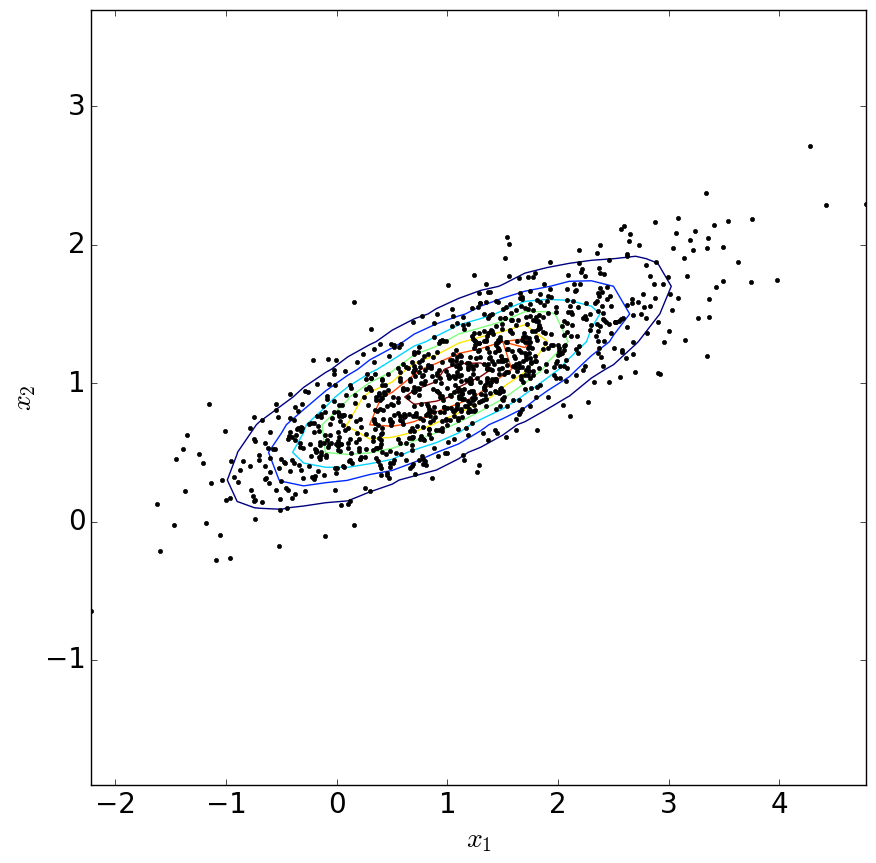

In [277]:
#random draw a sample following a 2D Gaussian distribution

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

mu = np.array([1.,1.])
s1 = 1. #sigma_1^2
s2 = 0.2 #sigma_2^2
rho = 0.8 #rho
sig = np.array([[s1, rho*np.sqrt(s1*s2)],[rho*np.sqrt(s1*s2),s2]]) #covariance matrix

xx = np.random.multivariate_normal(mu,sig,100000) #generate random numbers from 2D normal distribution
xgrid = np.arange(-2.,4.,0.2)
ygrid = np.arange(-2.,4.,0.2)
xcenter = (xgrid[0:-1]+xgrid[1:])/2.
ycenter = (ygrid[0:-1]+ygrid[1:])/2.
#make 2d histogram
hxx,xedge,yedge = np.histogram2d(xx[:,0],xx[:,1],bins=[xgrid,ygrid])

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111)
ax.plot(xx[0:1000,0],xx[0:1000,1],'k.')#random number
ax.contour(xcenter,ycenter,hxx.T)#contour
ax.set_xlabel(r'$x_1$',fontsize=20)
ax.set_ylabel(r'$x_2$',fontsize=20)
fig.show()


In [1]:
# Now do it with Gibbs sampler
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

mu = np.array([1.,1.])
s1 = 1.
s2 = 0.2
rho = 0.8
sig = np.array([[s1, rho*np.sqrt(s1*s2)],[rho*np.sqrt(s1*s2),s2]])
#xx = np.random.multivariate_normal(mu,sig,100000)

xx_g = np.zeros((100000,2))
xx_g1 = np.zeros((200000,2))

xx_g[0,0]=np.random.uniform(-3,3)
xx_g[0,1] = np.random.normal(mu[1]+rho*s2/s1*(xx[0,0]-mu[0]),s2*(1-rho**2))
xx_g1[0,:] = xx_g1[0]

for i in range(1,100000):
    xx_g[i,0] = np.random.normal(mu[0]+rho*np.sqrt(s1/s2)*(xx[i-1,1]-mu[1]),s1*(1-rho**2))
    xx_g1[2*i-1,0] = xx_g[i,0]
    xx_g1[2*i-1,1] = xx_g[i-1,1]
    xx_g[i,1] = np.random.normal(mu[1]+rho*np.sqrt(s2/s1)*(xx[i-1,0]-mu[0]),s2*(1-rho**2))
    xx_g1[2*i,0] = xx_g[i,0]
    xx_g1[2*i,1] = xx_g[i,1]
    
xgrid = np.arange(-2.,4.,0.2)
ygrid = np.arange(-2.,4.,0.2)
xcenter = (xgrid[0:-1]+xgrid[1:])/2.
ycenter = (ygrid[0:-1]+ygrid[1:])/2.
#hxx,xedge,yedge = np.histogram2d(xx[:,0],xx[:,1],bins=[xgrid,ygrid])
hxx_g,xedge,yedge = np.histogram2d(xx_g[:,0],xx_g[:,1],bins=[xgrid,ygrid])

fig = plt.figure(figsize=[12,4])
ax = fig.add_subplot(131)
#ax.plot(xx_g[0:10,0],xx_g[0:10,1],'k')
ax.plot(xx_g1[0:20,0],xx_g1[0:20,1],'k')
#ax.contour(xcenter,ycenter,hxx.T,colors='c')
ax.contour(xcenter,ycenter,hxx_g.T)
ax.set_xlabel(r'$x_1$',fontsize=20)
ax.set_ylabel(r'$x_2$',fontsize=20)

ax = fig.add_subplot(132)
#ax.plot(xx_g[0:100,0],xx_g[0:100,1],'k')
ax.plot(xx_g1[0:200,0],xx_g1[0:200,1],'k')
ax.contour(xcenter,ycenter,hxx_g.T)
ax.set_xlabel(r'$x_1$',fontsize=20)
#ax.set_ylabel(r'$x_2$',fontsize=20)

ax = fig.add_subplot(133)
#ax.plot(xx_g[0:1000,0],xx_g[0:1000,1],'k')
ax.plot(xx_g1[0:2000,0],xx_g1[0:2000,1],'k')
ax.contour(xcenter,ycenter,hxx_g.T)
ax.set_xlabel(r'$x_1$',fontsize=20)
#ax.set_ylabel(r'$x_2$',fontsize=20)
fig.show()

fig.savefig('Gibbs_sampler.png',bbox_inches='tight')

/Users/chao/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


acceptance rate for chain 1 is 0.94
acceptance rate for chain 2 is 0.94


/Users/cliu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:76: RuntimeWarning: divide by zero encountered in divide


acceptance rate for chain 3 is 0.94
acceptance rate for chain 2 is 0.94


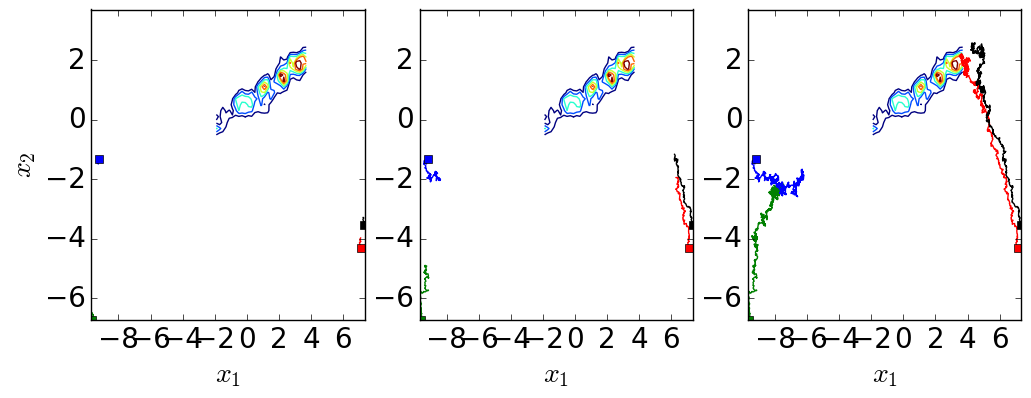

In [285]:
#now redo this rand draw with Metropolis algorithm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

mu = np.array([1.,1.])
s1 = 1.
s2 = 0.2
rho = 0.8
cov = np.array([[s1, rho*np.sqrt(s1*s2)],[rho*np.sqrt(s1*s2),s2]])
#xx = np.random.multivariate_normal(mu,sig,100000)

N = 10000
#4 walkers
xx_g1 = np.zeros((N,2))
xx_g2 = np.zeros((N,2))
xx_g3 = np.zeros((N,2))
xx_g4 = np.zeros((N,2))

pp1 = np.zeros((N,1))
pp2 = np.zeros((N,1))
pp3 = np.zeros((N,1))
pp4 = np.zeros((N,1))

cov_prop = np.array([[0.001,0.0],[0.0,0.001]])

#chain 1
xx_g1[0,:] = np.random.uniform(-10.,10.,size=2)
pp1[0] = stats.multivariate_normal.pdf(xx_g1[0,:],mu,cov)
n_acc = 0
n_all = 0
for i in range(1,10000):
    #draw the poprsal quantity from the proposal distribution
    xx = np.random.multivariate_normal(xx_g1[i-1,:],cov_prop,1)
    p1 = stats.multivariate_normal.pdf(xx, mu,cov)
    r0 = p1/pp1[i-1]
    if np.random.rand()<r0:
        xx_g1[i,:] = xx
        pp1[i] = p1
        n_acc += 1
    else:
        xx_g1[i,:] = xx_g1[i-1,:]
        pp1[i] = pp1[i-1]
    n_all += 1
print 'acceptance rate for chain 1 is %(n).2f' % {'n': n_acc/float(n_all)}

#chain 2
xx_g2[0,:] = np.random.uniform(-10.,10.,size=2)
pp2[0] = stats.multivariate_normal.pdf(xx_g2[0,:],mu,cov)
n_acc = 0
n_all = 0
for i in range(1,10000):
    #draw the poprsal quantity from the proposal distribution
    xx = np.random.multivariate_normal(xx_g2[i-1,:],cov_prop,1)
    p1 = stats.multivariate_normal.pdf(xx, mu,cov)
    r0 = p1/pp2[i-1]
    if np.random.rand()<r0:
        xx_g2[i,:] = xx
        pp2[i] = p1
        n_acc += 1
    else:
        xx_g2[i,:] = xx_g2[i-1,:]
        pp2[i] = pp2[i-1]
    n_all += 1
print 'acceptance rate for chain 2 is %(n).2f' % {'n': n_acc/float(n_all)}

#chain 3
xx_g3[0,:] = np.random.uniform(-10.,10.,size=2)
pp3[0] = stats.multivariate_normal.pdf(xx_g3[0,:],mu,cov)
n_acc = 0
n_all = 0
for i in range(1,10000):
    #draw the poprsal quantity from the proposal distribution
    xx = np.random.multivariate_normal(xx_g3[i-1,:],cov_prop,1)
    p1 = stats.multivariate_normal.pdf(xx, mu,cov)
    r0 = p1/pp3[i-1]
    if np.random.rand()<r0:
        xx_g3[i,:] = xx
        pp3[i] = p1
        n_acc += 1
    else:
        xx_g3[i,:] = xx_g3[i-1,:]
        pp2[i] = pp2[i-1]
    n_all += 1
print 'acceptance rate for chain 3 is %(n).2f' % {'n': n_acc/float(n_all)}

#chain 4
xx_g4[0,:] = np.random.uniform(-10.,10.,size=2)
pp4[0] = stats.multivariate_normal.pdf(xx_g4[0,:],mu,cov)
n_acc = 0
n_all = 0
for i in range(1,10000):
    #draw the poprsal quantity from the proposal distribution
    xx = np.random.multivariate_normal(xx_g4[i-1,:],cov_prop,1)
    p1 = stats.multivariate_normal.pdf(xx, mu,cov)
    r0 = p1/pp4[i-1]
    if np.random.rand()<r0:
        xx_g4[i,:] = xx
        pp4[i] = p1
        n_acc += 1
    else:
        xx_g4[i,:] = xx_g4[i-1,:]
        pp4[i] = pp4[i-1]
    n_all += 1
print 'acceptance rate for chain 2 is %(n).2f' % {'n': n_acc/float(n_all)}



xgrid = np.arange(-2.,4.,0.2)
ygrid = np.arange(-2.,4.,0.2)
xcenter = (xgrid[0:-1]+xgrid[1:])/2.
ycenter = (ygrid[0:-1]+ygrid[1:])/2.
hxx_g1,xedge,yedge = np.histogram2d(xx_g1[:,0],xx_g1[:,1],bins=[xgrid,ygrid])
hxx_g2,xedge,yedge = np.histogram2d(xx_g2[:,0],xx_g2[:,1],bins=[xgrid,ygrid])
hxx_g3,xedge,yedge = np.histogram2d(xx_g3[:,0],xx_g3[:,1],bins=[xgrid,ygrid])
hxx_g4,xedge,yedge = np.histogram2d(xx_g4[:,0],xx_g4[:,1],bins=[xgrid,ygrid])
hxx = hxx_g1 + hxx_g2 + hxx_g3 + hxx_g4

fig = plt.figure(figsize=[12,4])
ax = fig.add_subplot(131)
n = 20
ax.plot(xx_g1[0:n,0],xx_g1[0:n,1],'r')
ax.plot(xx_g2[0:n,0],xx_g2[0:n,1],'g')
ax.plot(xx_g3[0:n,0],xx_g3[0:n,1],'b')
ax.plot(xx_g4[0:n,0],xx_g4[0:n,1],'k')
ax.plot(xx_g1[0,0],xx_g1[0,1],'rs')
ax.plot(xx_g2[0,0],xx_g2[0,1],'gs')
ax.plot(xx_g3[0,0],xx_g3[0,1],'bs')
ax.plot(xx_g4[0,0],xx_g4[0,1],'ks')
ax.contour(xcenter,ycenter,hxx.T)
ax.set_xlabel(r'$x_1$',fontsize=20)
ax.set_ylabel(r'$x_2$',fontsize=20)

ax = fig.add_subplot(132)
n = 200
ax.plot(xx_g1[0:n,0],xx_g1[0:n,1],'r')
ax.plot(xx_g2[0:n,0],xx_g2[0:n,1],'g')
ax.plot(xx_g3[0:n,0],xx_g3[0:n,1],'b')
ax.plot(xx_g4[0:n,0],xx_g4[0:n,1],'k')
ax.plot(xx_g1[0,0],xx_g1[0,1],'rs')
ax.plot(xx_g2[0,0],xx_g2[0,1],'gs')
ax.plot(xx_g3[0,0],xx_g3[0,1],'bs')
ax.plot(xx_g4[0,0],xx_g4[0,1],'ks')
ax.contour(xcenter,ycenter,hxx.T)
ax.set_xlabel(r'$x_1$',fontsize=20)
#ax.set_ylabel(r'$x_2$',fontsize=20)

ax = fig.add_subplot(133)
n = 1000
ax.plot(xx_g1[0:n,0],xx_g1[0:n,1],'r')
ax.plot(xx_g2[0:n,0],xx_g2[0:n,1],'g')
ax.plot(xx_g3[0:n,0],xx_g3[0:n,1],'b')
ax.plot(xx_g4[0:n,0],xx_g4[0:n,1],'k')
ax.plot(xx_g1[0,0],xx_g1[0,1],'rs')
ax.plot(xx_g2[0,0],xx_g2[0,1],'gs')
ax.plot(xx_g3[0,0],xx_g3[0,1],'bs')
ax.plot(xx_g4[0,0],xx_g4[0,1],'ks')
ax.contour(xcenter,ycenter,hxx.T)
ax.set_xlabel(r'$x_1$',fontsize=20)
#ax.set_ylabel(r'$x_2$',fontsize=20)
fig.show()

fig.savefig('Metropolis_sample.png',bbox_tight='tight')

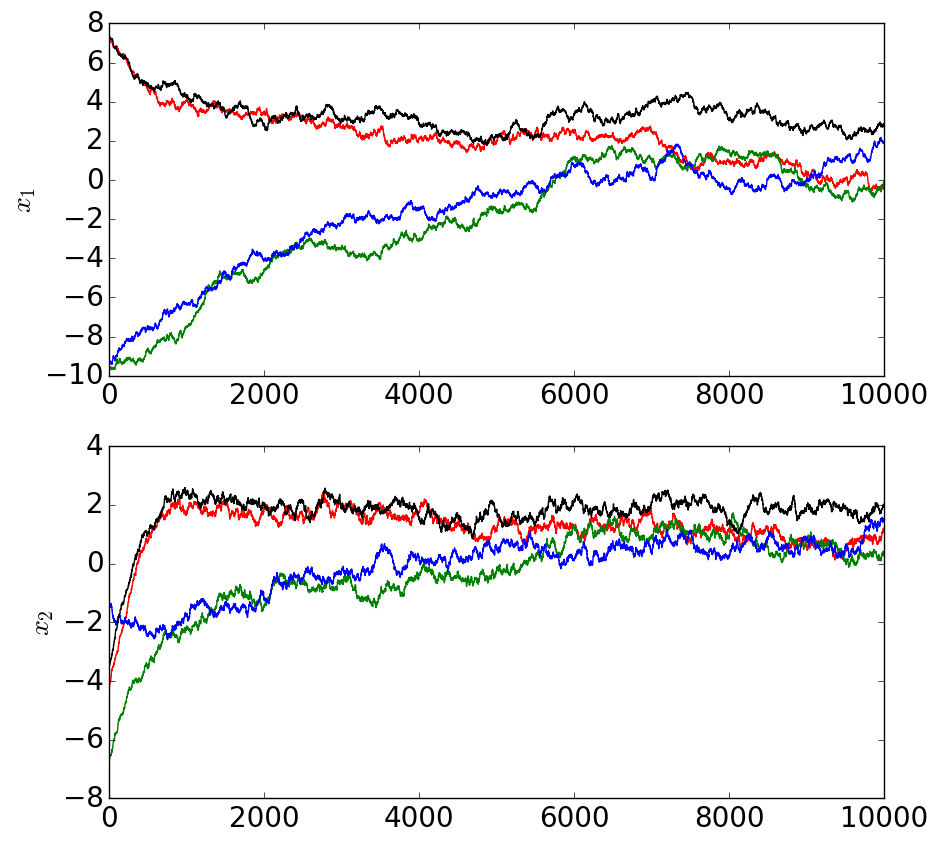

In [286]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(211)
ax.plot(xx_g1[:,0],'r')
ax.plot(xx_g2[:,0],'g')
ax.plot(xx_g3[:,0],'b')
ax.plot(xx_g4[:,0],'k')
ax.set_ylabel(r'$x_1$',fontsize=20)
ax = fig.add_subplot(212)
ax.plot(xx_g1[:,1],'r')
ax.plot(xx_g2[:,1],'g')
ax.plot(xx_g3[:,1],'b')
ax.plot(xx_g4[:,1],'k')
ax.set_ylabel(r'$x_2$',fontsize=20)

fig.show()
fig.savefig('Metropolis_converge.png',bbox_inches='tight')

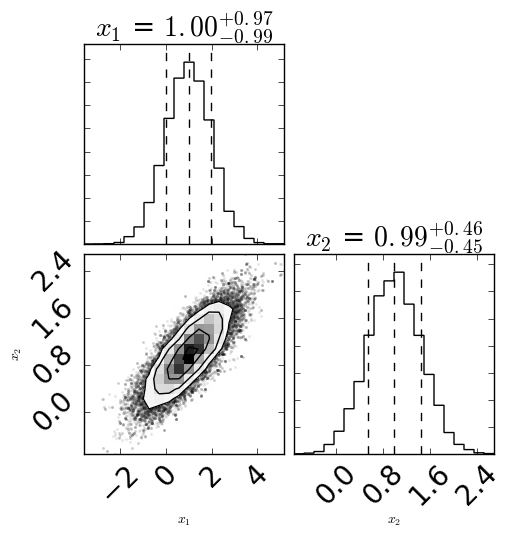

In [264]:
#redo this with emcee package
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner

def lnprob(x, mu, cov):
    return np.log(stats.multivariate_normal.pdf(x,mu,cov))

ndim = 2

mu = np.array([1.,1.])
s1 = 1.
s2 = 0.2
rho = 0.8
cov = np.array([[s1, rho*np.sqrt(s1*s2)],[rho*np.sqrt(s1*s2),s2]])

nwalkers = 50

p0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[mu, cov])

pos, prob, state = sampler.run_mcmc(p0, 100)
sampler.reset()

sampler.run_mcmc(pos, 1000)

samples = sampler.chain[:, 100:, :].reshape((-1, ndim))

fig = corner.corner(samples,labels=[r"$x_1$", r"$x_2$"],\
                       quantiles=[0.16, 0.5, 0.84],\
                       show_titles=True, title_kwargs={"fontsize": 20})
fig.savefig('emcee_sample.png',bbox_inches='tight')

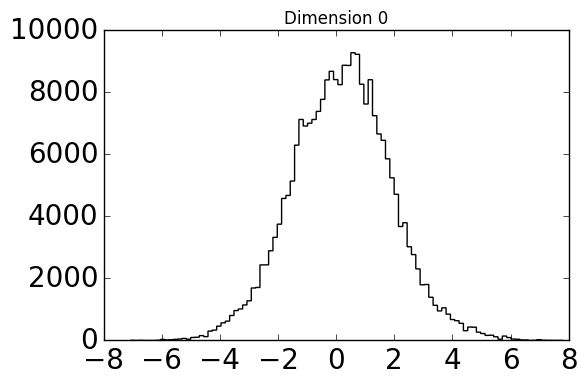

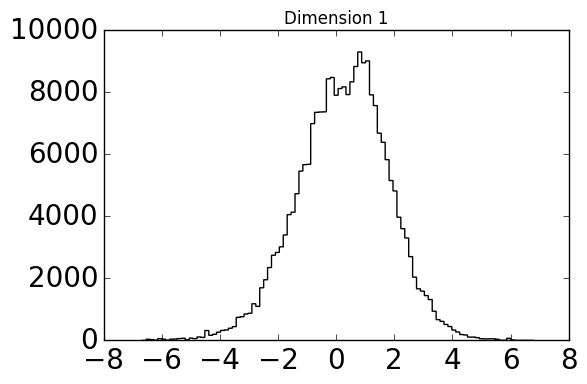

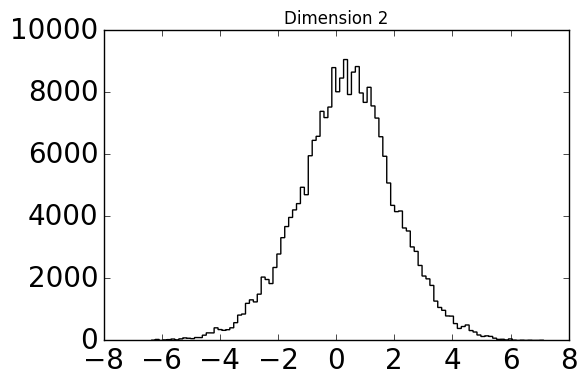

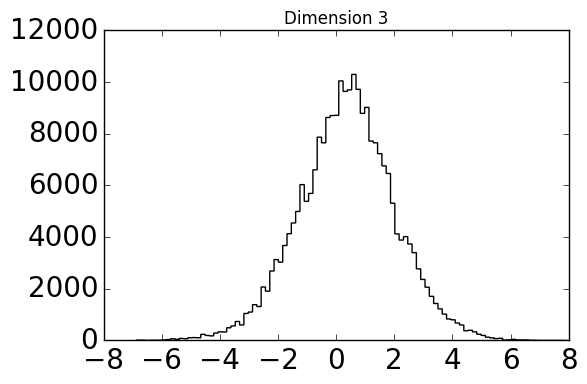

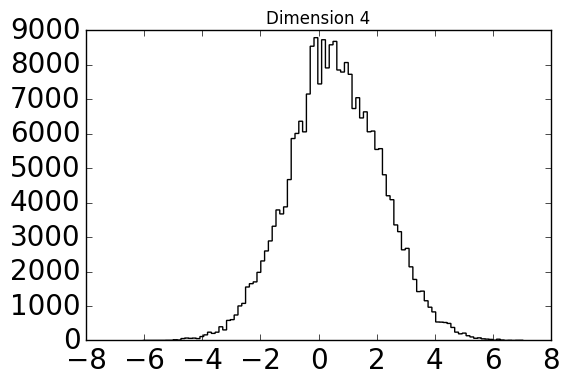

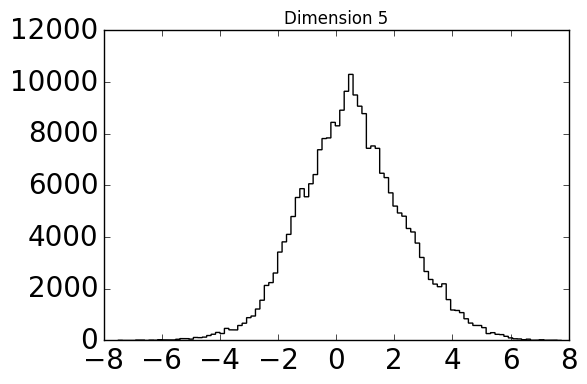

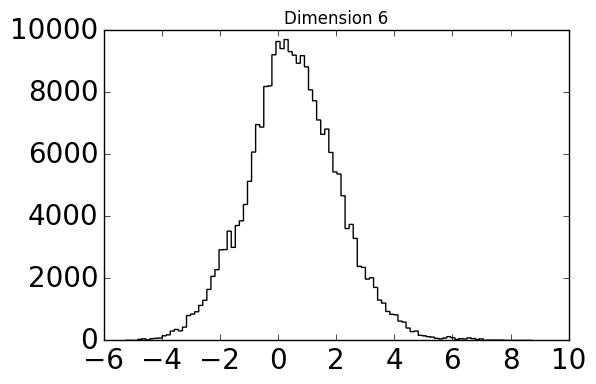

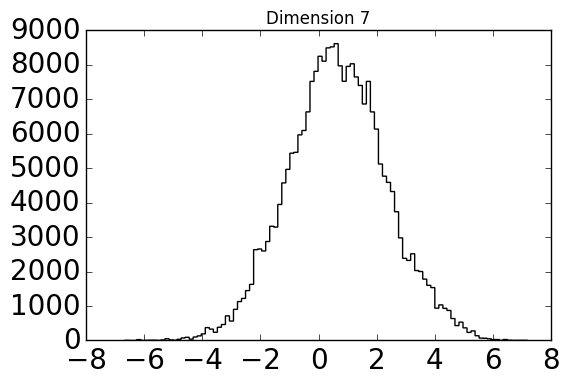

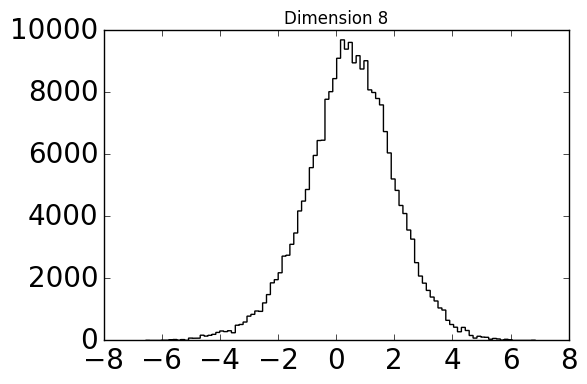

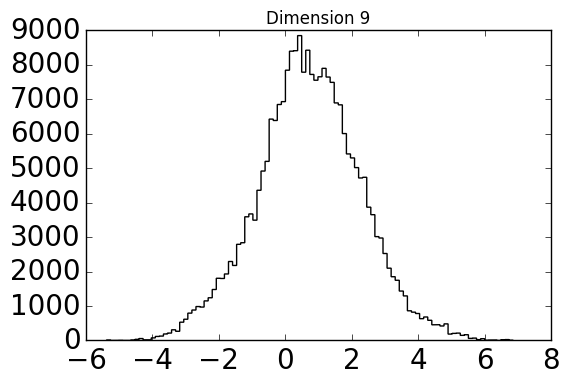

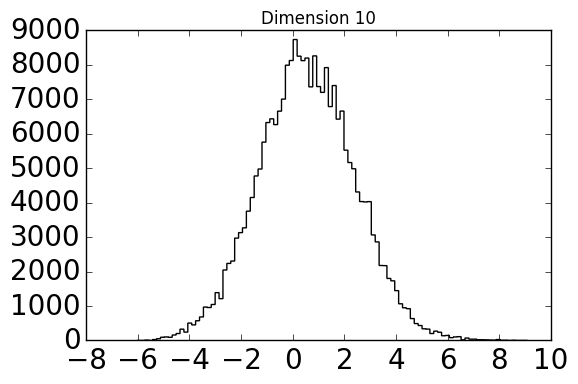

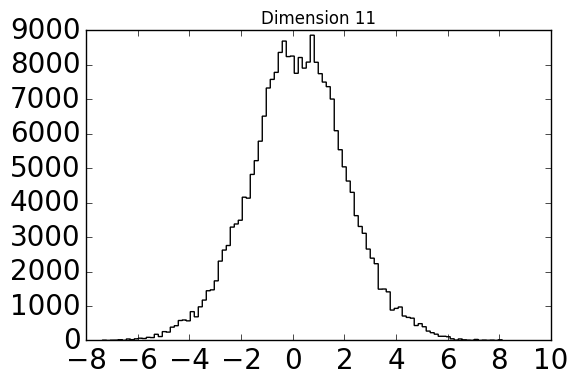

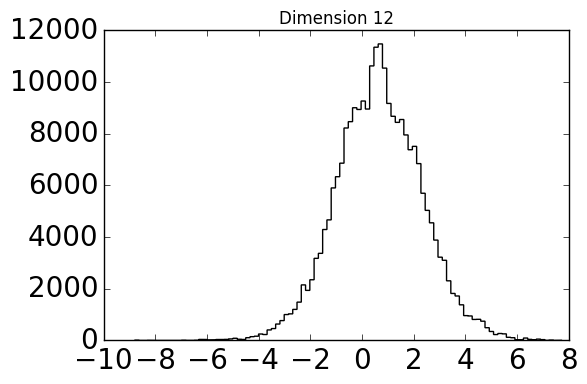

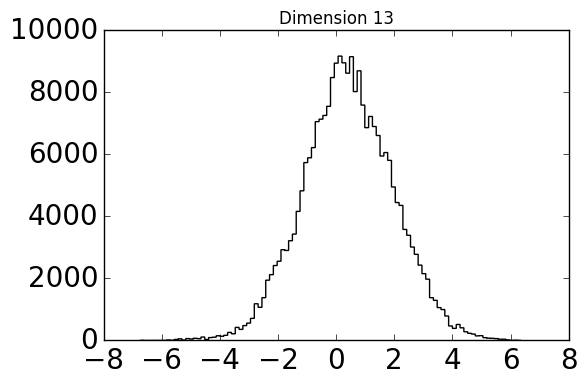

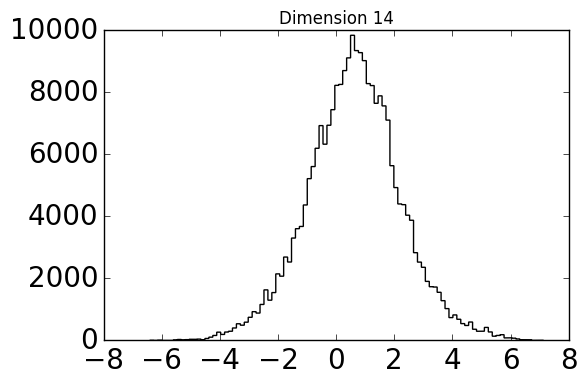

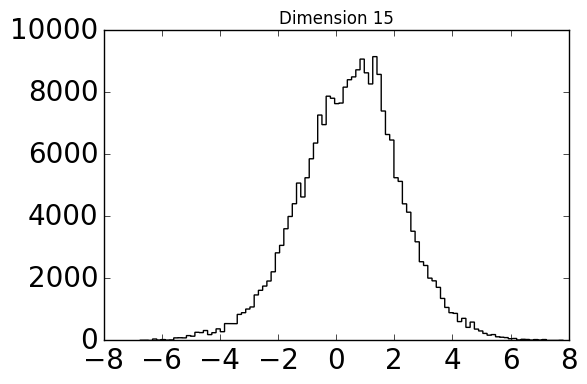

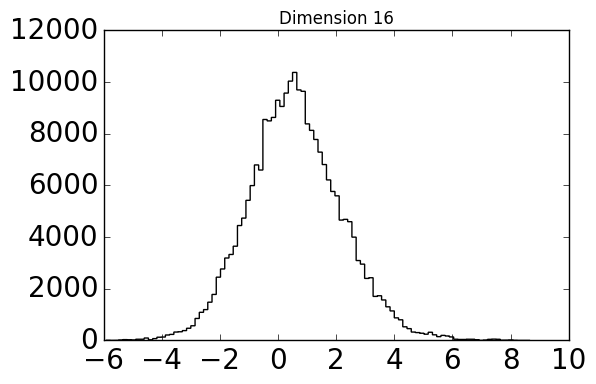

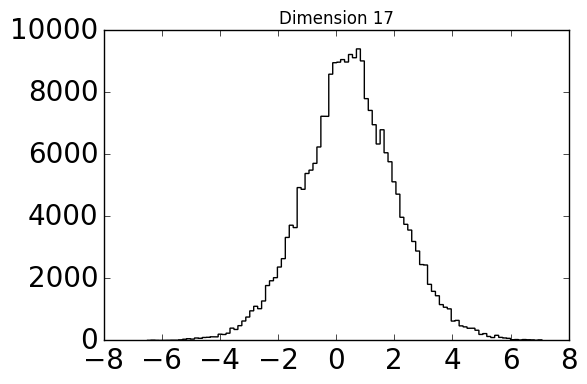

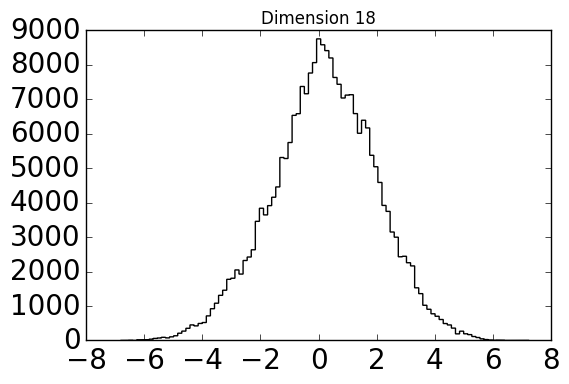

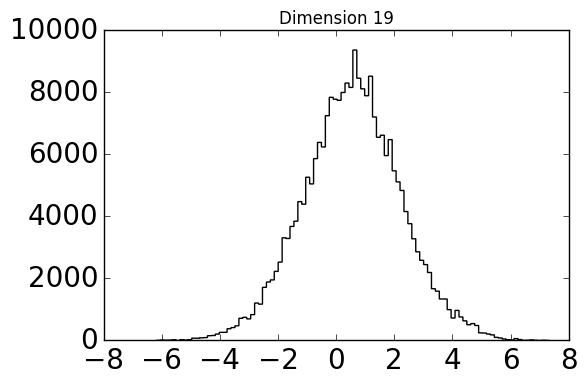

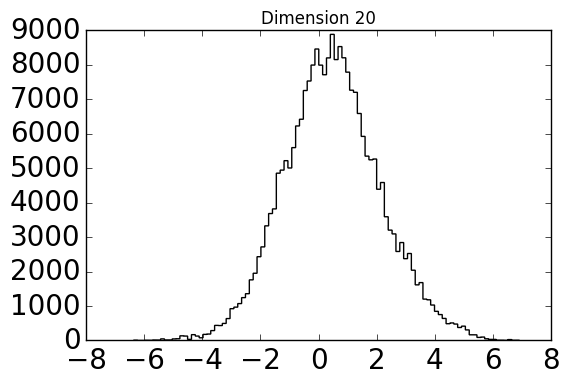

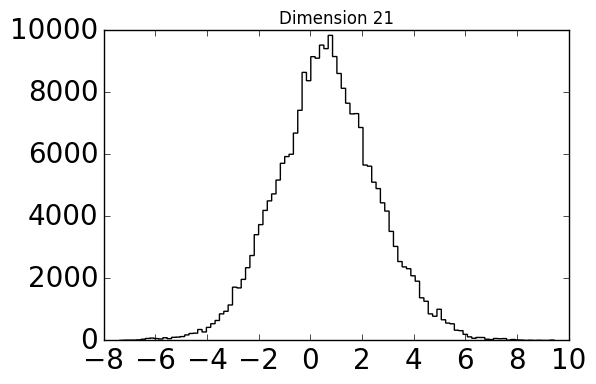

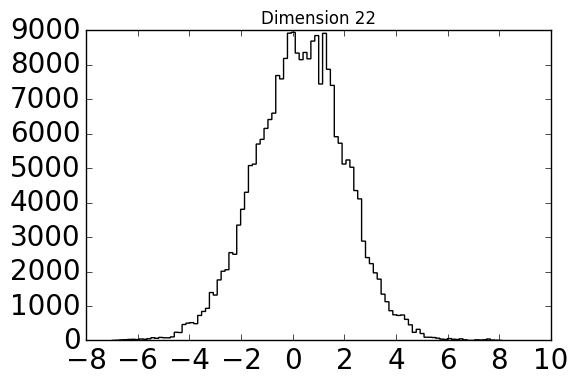

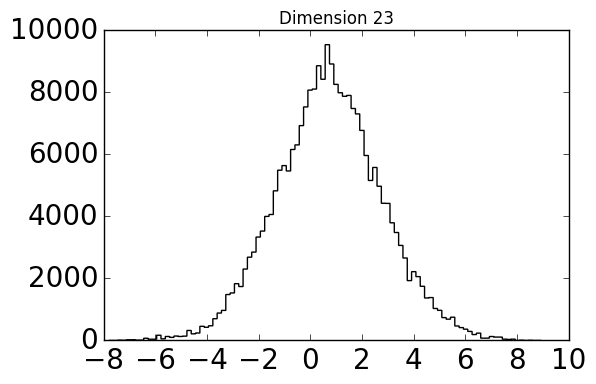

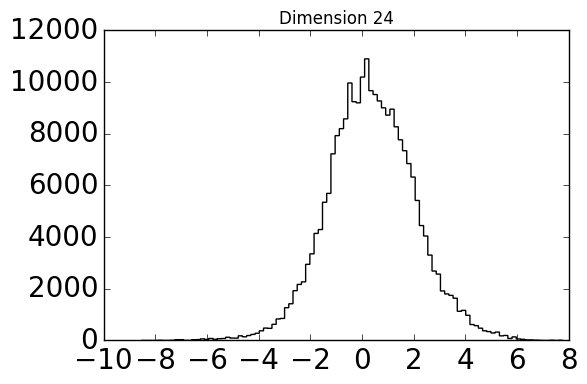

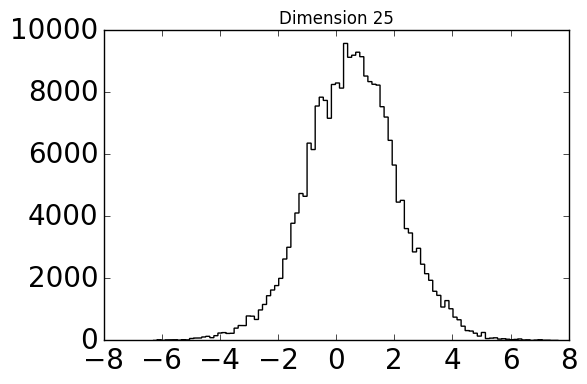

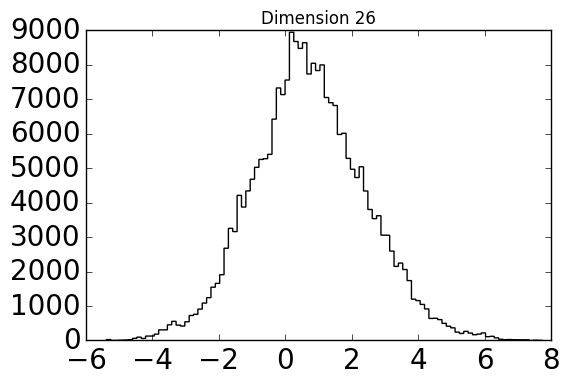

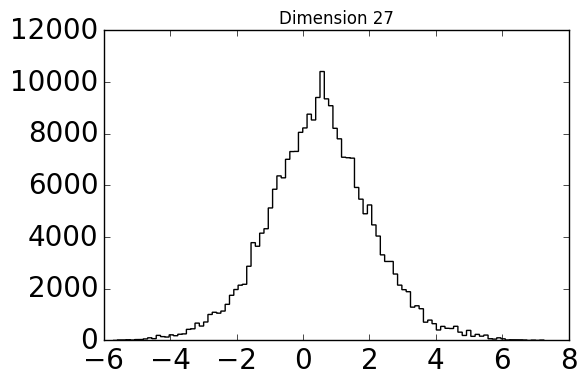

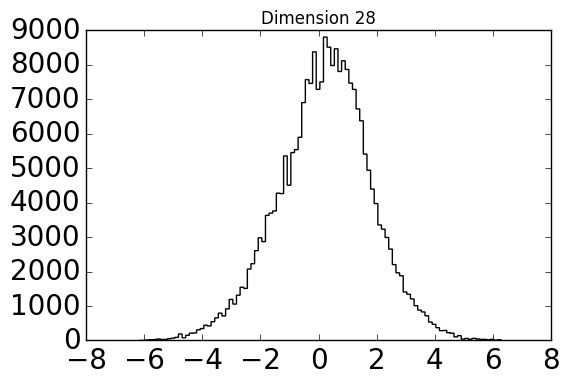

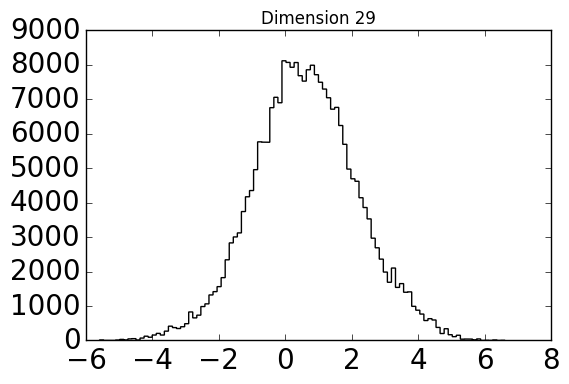

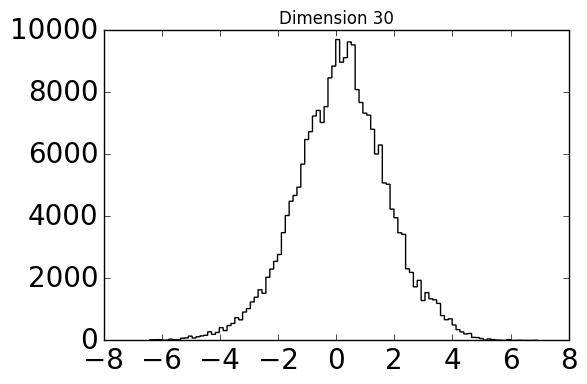

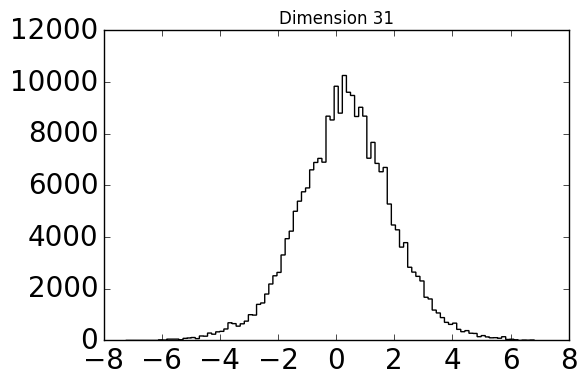

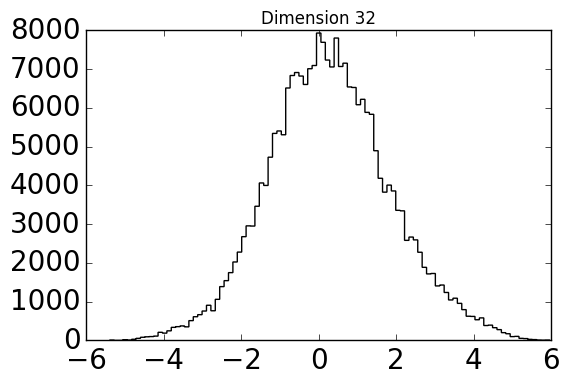

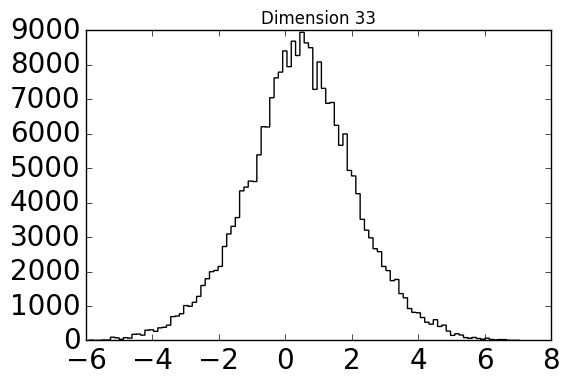

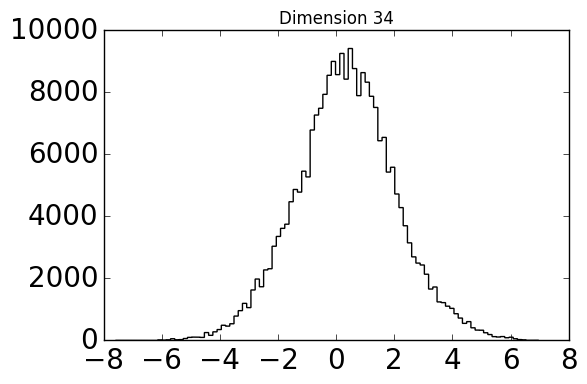

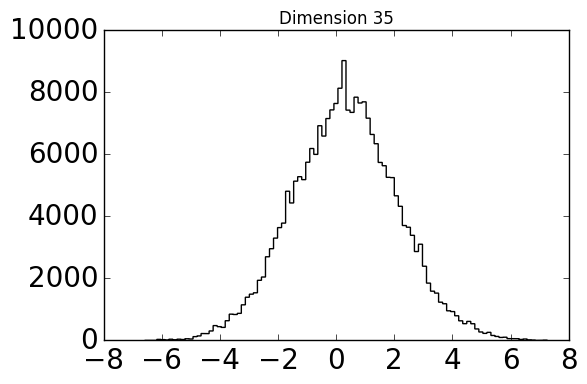

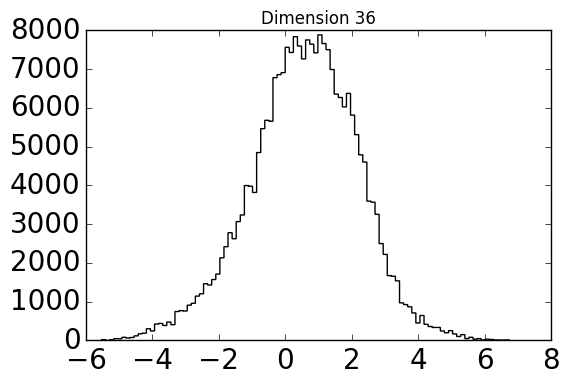

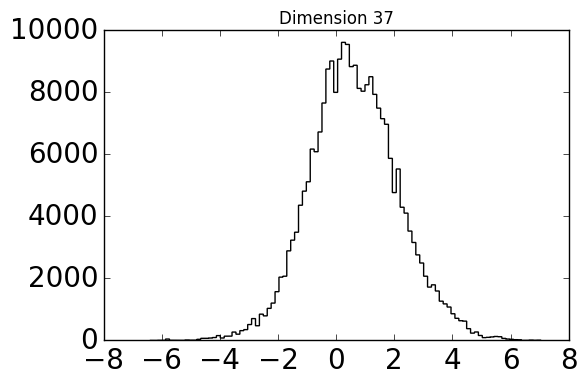

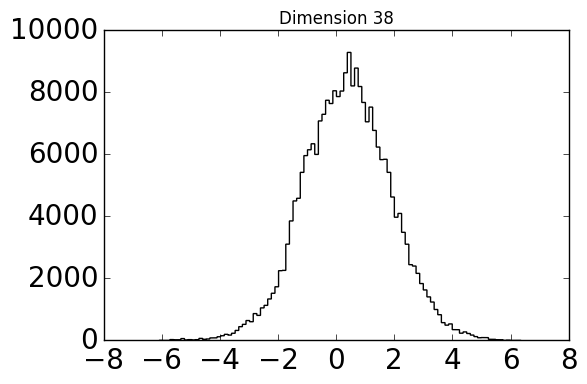

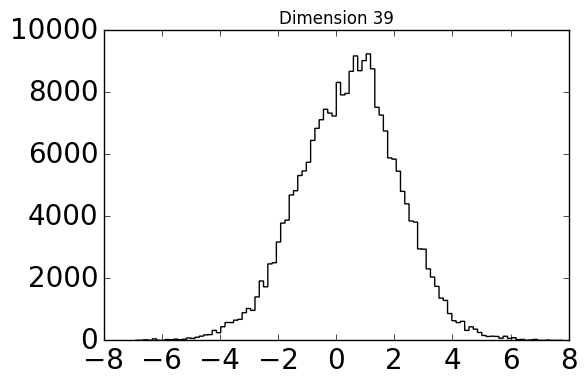

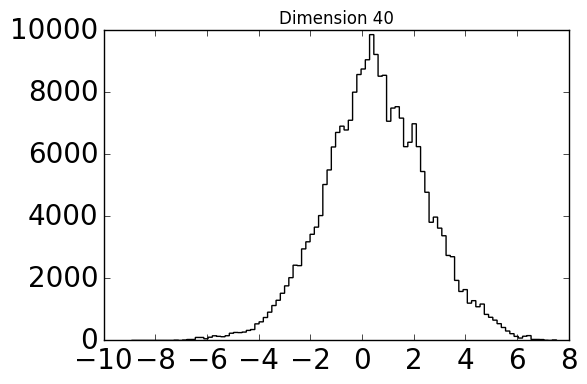

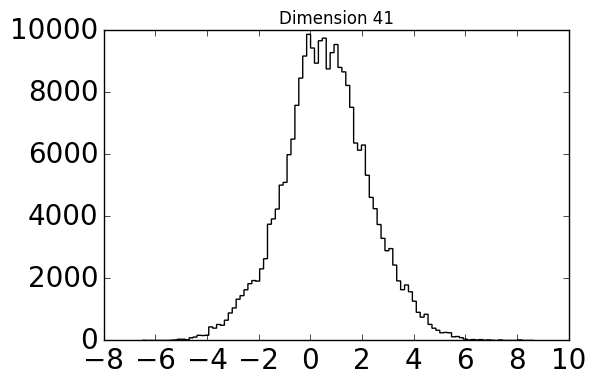

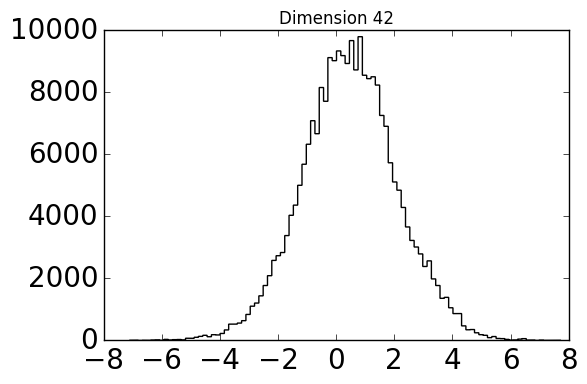

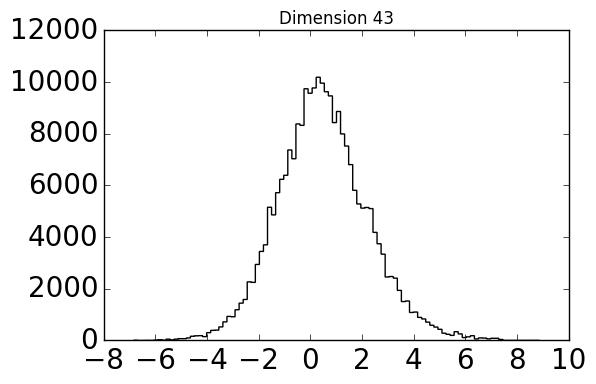

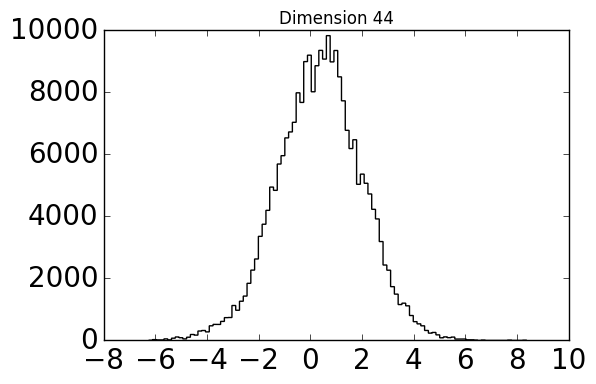

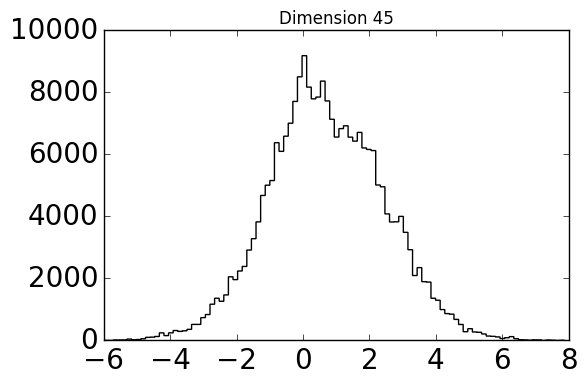

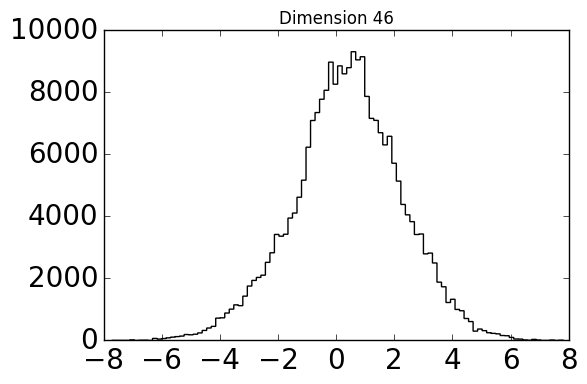

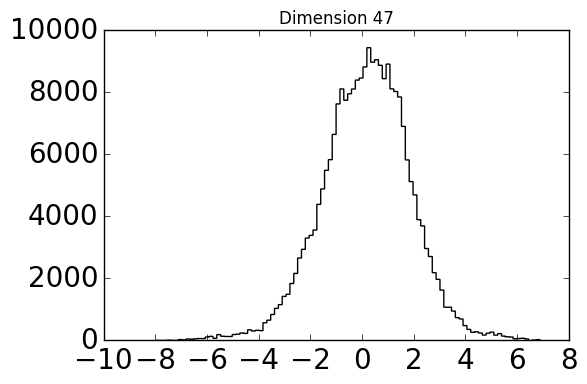

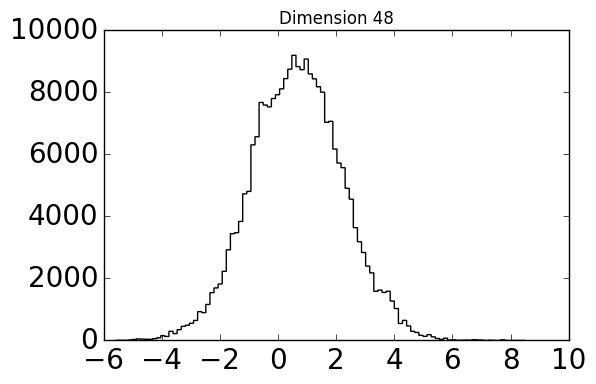

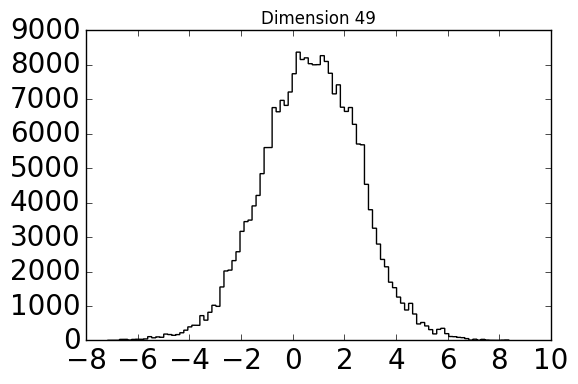

Mean acceptance fraction: 0.191


In [265]:
import numpy as np
import matplotlib.pyplot as pl
import emcee
import corner

def lnprob(x, mu, icov):
    diff = x-mu
    return -np.dot(diff,np.dot(icov,diff))/2.0

ndim = 50

means = np.random.rand(ndim)

cov = 0.5 - np.random.rand(ndim ** 2).reshape((ndim, ndim))
cov = np.triu(cov)
cov += cov.T - np.diag(cov.diagonal())
cov = np.dot(cov,cov)

icov = np.linalg.inv(cov)

nwalkers = 250
p0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[means, icov])

pos, prob, state = sampler.run_mcmc(p0, 100)
sampler.reset()

sampler.run_mcmc(pos, 1000)

for i in range(ndim):
    pl.figure()
    pl.hist(sampler.flatchain[:,i], 100, color="k", histtype="step")
    pl.title("Dimension {0:d}".format(i))

pl.show()

print("Mean acceptance fraction: {0:.3f}"
                .format(np.mean(sampler.acceptance_fraction)))

In [43]:
PMS_A = 8899./12318.8
PMS_B = 2471./2919.63
print PMS_A, PMS_B, PMS_A*PMS_B
PRGB_A = 907.5/12318.8
PRGB_B = 188.9/2919.63
PRGB_AB = PRGB_A*PRGB_B
print PRGB_A, PRGB_B, PRGB_AB
PRGB50_1 = PRGB_AB-2*0.5*50/12318.8*50/2919.63
print PRGB50_1

PRGB50_2 = PRGB_B*50/12318.8 + 0.5*(PRGB_B*188.9/12318.8-((188.9-50)/2919.63)*((188.9-50)/12318.8))
print PRGB50_2

PRGB50_21 = PRGB_B*100/12318.8 - 0.5*(50/2919.63*50/12318.8)
print PRGB50_21


0.722391791408 0.84634011844 0.6113891543
0.0736678897295 0.0646999791069 0.00476631092635
0.00469680148681
0.000490458605444
0.000490458605444


In [41]:
print PRGB_B*50/12318.8
print 0.5*(PRGB_B*188.9/12318.8-(PRGB_B-50/2919.63)*((188.9-50)/12318.8))
print 0.5*(50/2919.63*50/12318.8)

0.000262606662609
0.000227851942835
3.47547197736e-05


In [13]:
import numpy as np

age1p5 = np.array([0., 2471.,53.76, 5.05, 63.42, 188.9, 137.5])
age1p0 = np.array([0., 8899.,376.3, 1995, 8., 907.5, 133.0])
# cumsum of time intervals
csage1p0 = np.cumsum(age1p0)
csage1p5 = np.cumsum(age1p5)
P1 = (age1p0[1]/age1p0.sum())*(age1p5[1]/age1p5.sum())
P2 = (age1p0[5]/age1p0.sum())*(age1p5[5]/age1p5.sum())
P3 = (907.5+188.9-100)/csage1p0[-1]
P4 = 100/csage1p0[-1]

print(P1*100., '%')
print(P2*100., '%')
print(P3*100., '%') # wrong answer
print(P4*100., '%')

(61.138915430030359, '%')
(0.47663109263523668, '%')
(8.0884501737182202, '%')
(0.81176737993960446, '%')


In [20]:
(age1p5[5]/age1p5.sum())

0.064699979106941627

In [21]:
age1p5[5]

188.90000000000001